# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

## Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.


## Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


## About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 


## You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.


# Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)


In [1]:
import warnings
warnings.simplefilter("ignore")
import missingno as ms   #for missing values visualization
import joblib

import pandas as pd
import numpy as np
import seaborn as sns    #for creating heatmap, time series plot, violin plots &so on
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

import scipy
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
import matplotlib.style as style   #for changing styles of plots
style.use("ggplot")
sns.set_style("whitegrid")
plt.rcParams["font.size"]=15
plt.rcParams["figure.figsize"]=(15,10)
plt.rcParams['figure.facecolor'] = 'xkcd:mint green'

## import dataset

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


We can see that there are 31647 rows and 18 columns. This is our training data, we will use this data to train our model and 'Subscribed' is our target column.


### About the data

In [4]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [6]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [7]:
df.shape

(31647, 18)

## Data Preprocessing

### Get general information about the dataset


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


We can see from above details that there are no null values present but there are object type columns available so we will encode them in the following steps.

## missing/null  values

In [9]:
#To check null values present or not
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

there is no missing values present in the data

<AxesSubplot:>

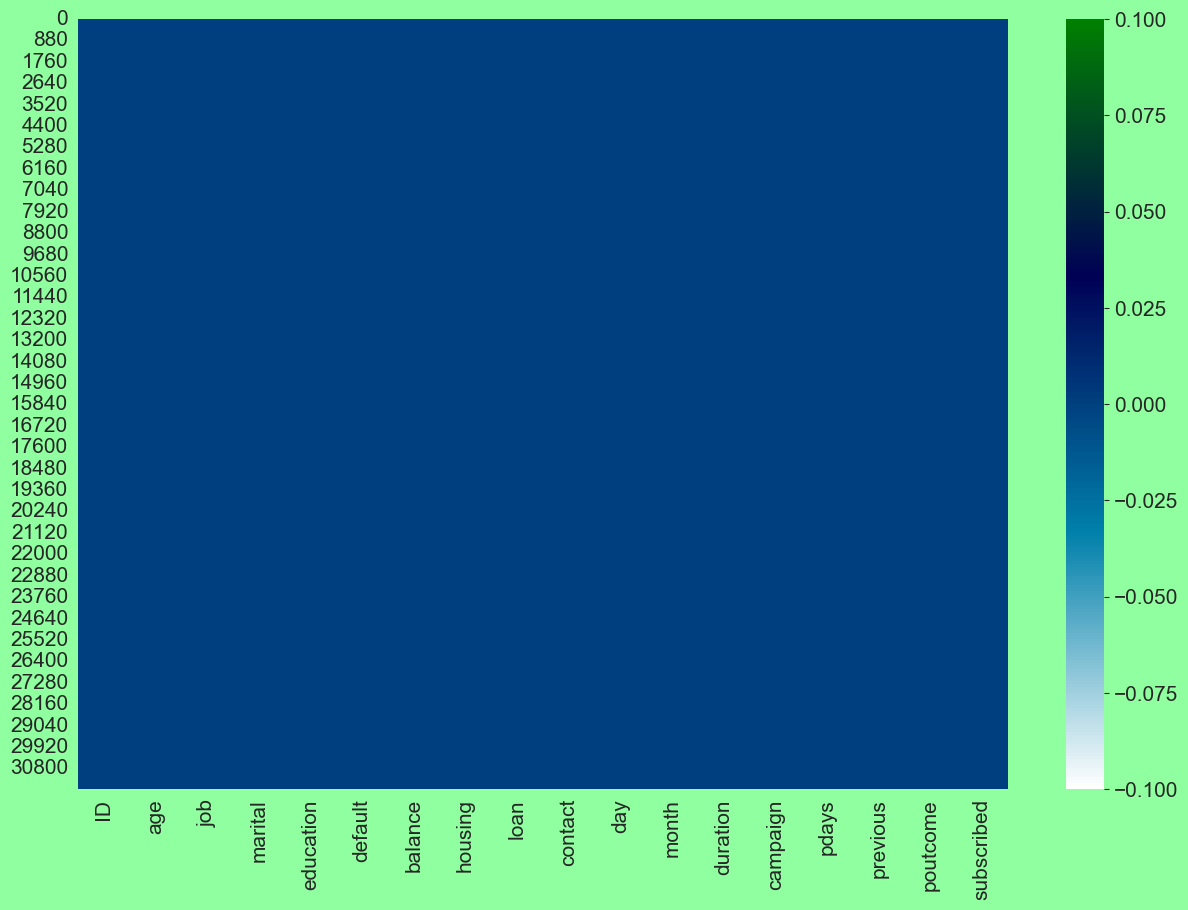

In [10]:
#cvisually showing missing values
sns.heatmap(df.isnull(), cmap='ocean_r')

In [11]:
#to find unique values present in the dataset
df.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

from above info we can say that, dataset prediction is categorial type.

In [12]:
df["subscribed"].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [13]:
#TO CHECK WHETHER DUPLICATE VALUES PRESENT OR NOT
df.duplicated().sum()

0

there is no duplicated values

# let's import test dataset

In [14]:
df1=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv")
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


### About the data

In [15]:
df1.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [16]:
df1.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [17]:
df1.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [18]:
df1.shape

(13564, 17)

only 17 column available in test dataset and there is no target column

## Data Preprocessing

### Get general information about the dataset


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


We can see from above details that there are no null values present but there are object type columns available so we will encode them in the following steps.

## missing/null  values

In [20]:
#To check null values present or not
df1.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

there is no missing values present in the data

<AxesSubplot:>

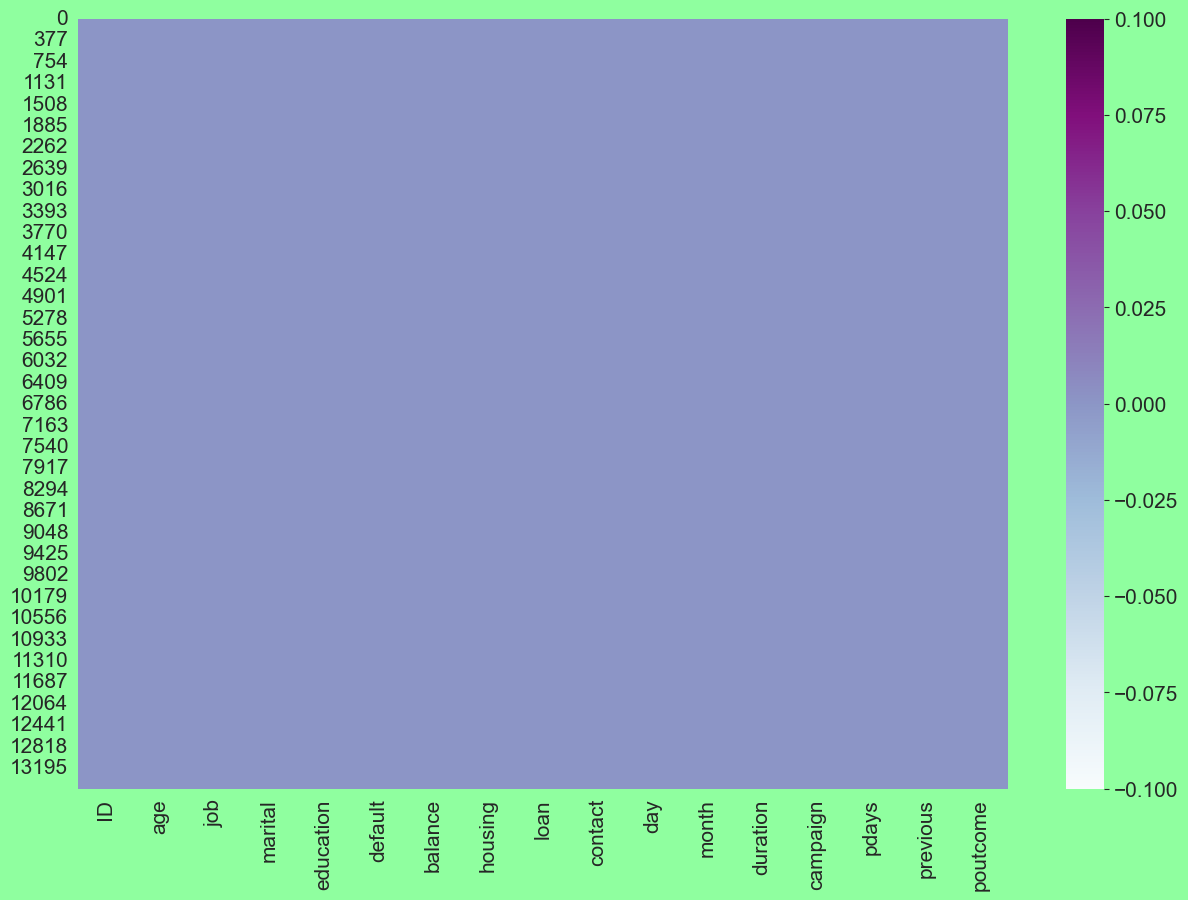

In [21]:
#cvisually showing missing values
sns.heatmap(df1.isnull(), cmap='BuPu')

In [22]:
#to find unique values present in the dataset
df1.nunique()

ID           13564
age             75
job             12
marital          3
education        4
default          2
balance       4292
housing          2
loan             2
contact          3
day             31
month           12
duration      1201
campaign        40
pdays          422
previous        33
poutcome         4
dtype: int64

In [23]:
#TO CHECK WHETHER DUPLICATE VALUES PRESENT OR NOT
df1.duplicated().sum()

0

there is no duplicated values

# Lets analyse the train data

In [24]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [25]:
#now we seperate the data columns 

categorial_data = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorial_data.append(i) 
print("Categorial Columns:", categorial_data)
print("\n")

numerical_data=[]
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        numerical_data.append(i)
print("Numerical data:",numerical_data)
print("\n")

Categorial Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


Numerical data: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']




# Lets analyse train data via countplot

In [26]:
for i in df.columns:
    print (df[i].value_counts())
    print("\n")

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

no     27932
yes     3715
Name: subscribed, dtype: int64


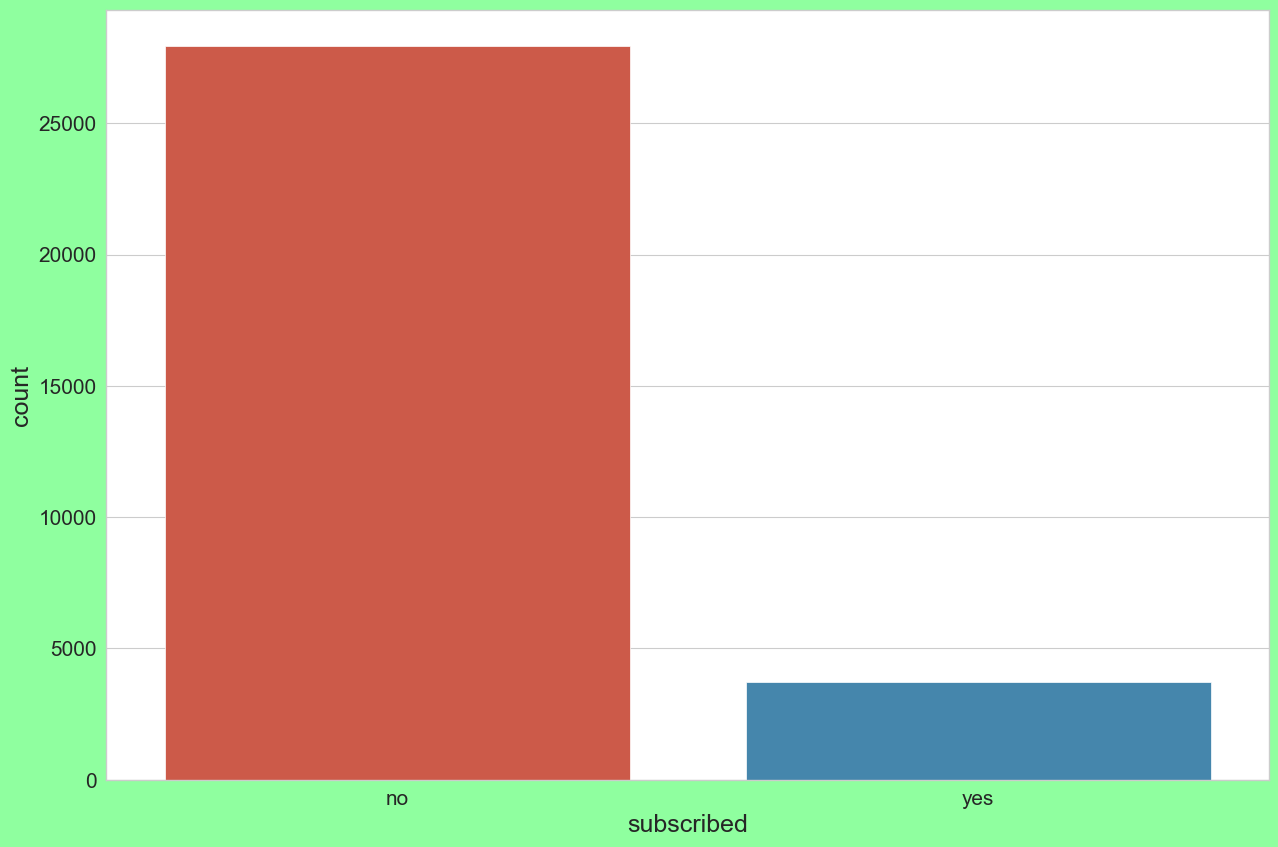

In [27]:
print(df['subscribed'].value_counts())
sns.countplot(data=df, x='subscribed')
plt.show()

### there are lot of people(27932) showing NO interest to  subscribe the loan than yes people

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


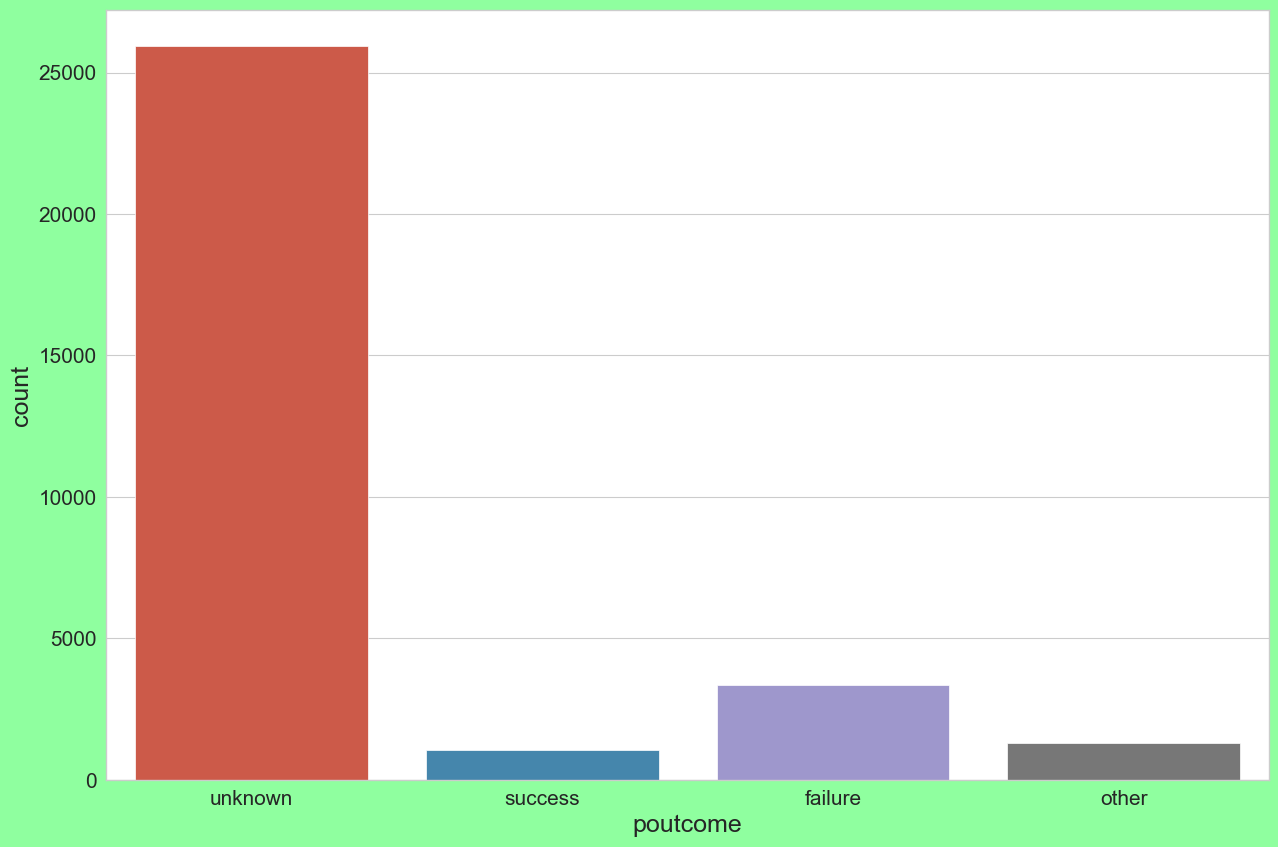

In [28]:
l="poutcome"
print(df[l].value_counts())
sns.countplot(data=df, x=l)
plt.show()

### outcome of the previous marketing campaign SUCCESS is less than the failure and more unknown status

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


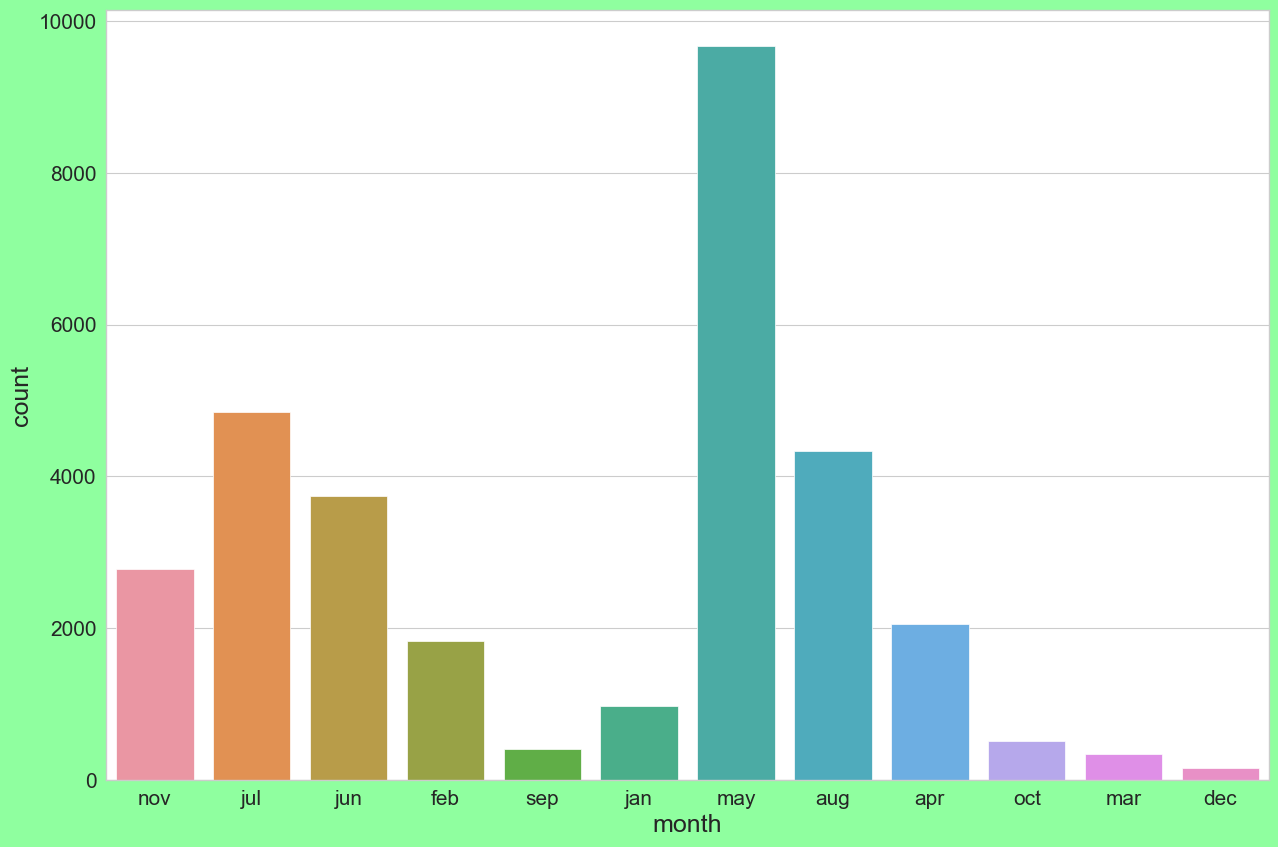

In [29]:
l="month"
print(df[l].value_counts())
sns.countplot(data=df, x=l)
plt.show()

#### people have contacted more in  MAY month(9669)  than other months. and december(157) is least and following march(342)

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


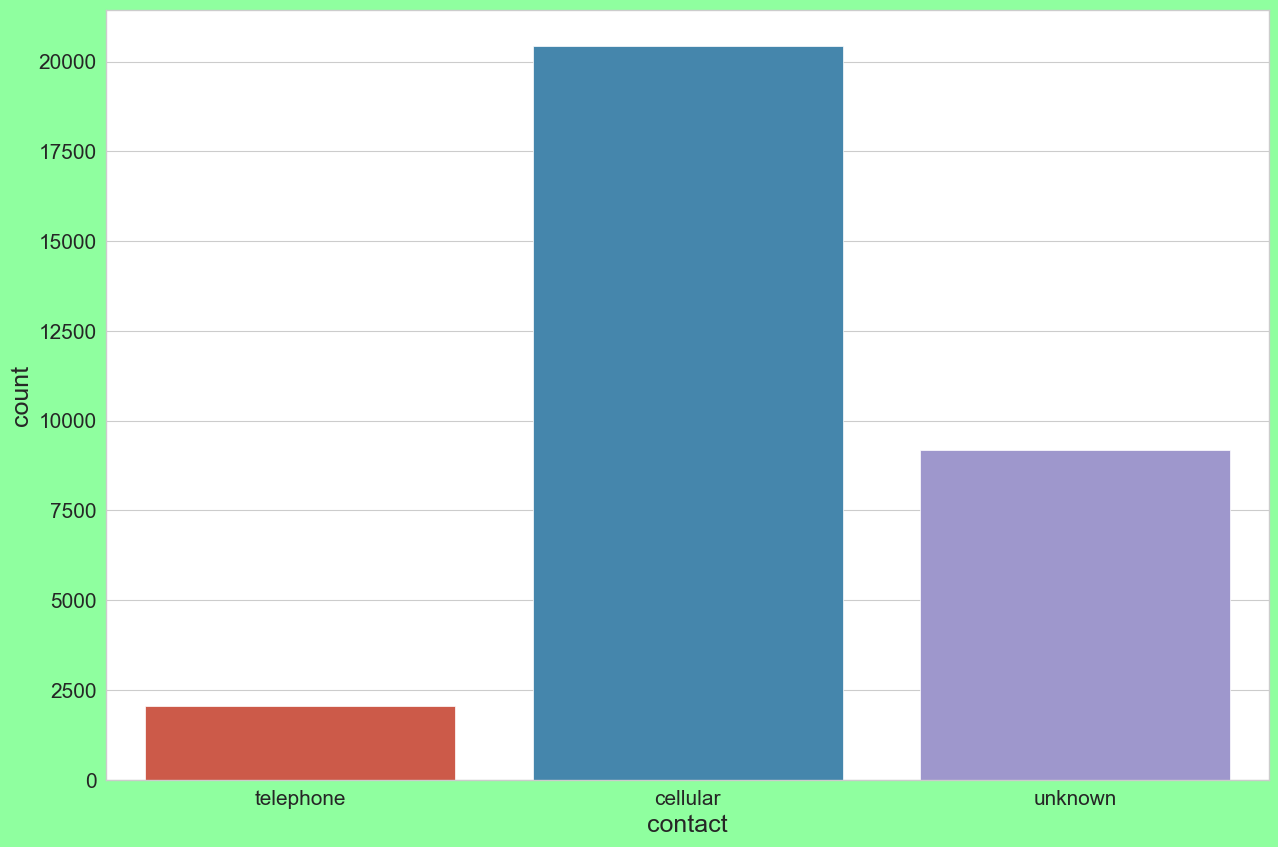

In [30]:
l="contact"
print(df[l].value_counts())
sns.countplot(data=df, x=l)
plt.show()

### Type of communication through CELLULAR is more than other method

no     26516
yes     5131
Name: loan, dtype: int64


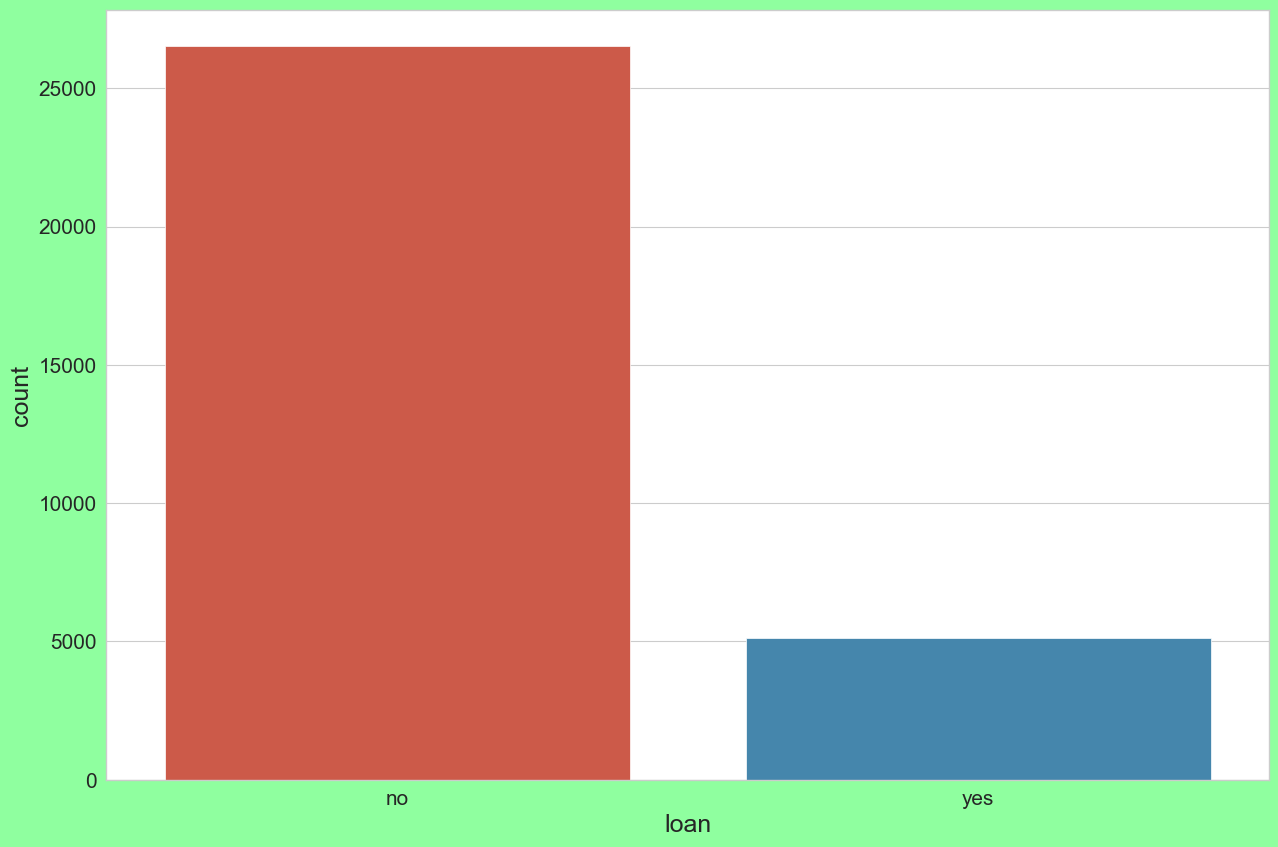

In [31]:
l="loan"
print(df[l].value_counts())
sns.countplot(data=df, x=l)
plt.show()

yes    17584
no     14063
Name: housing, dtype: int64


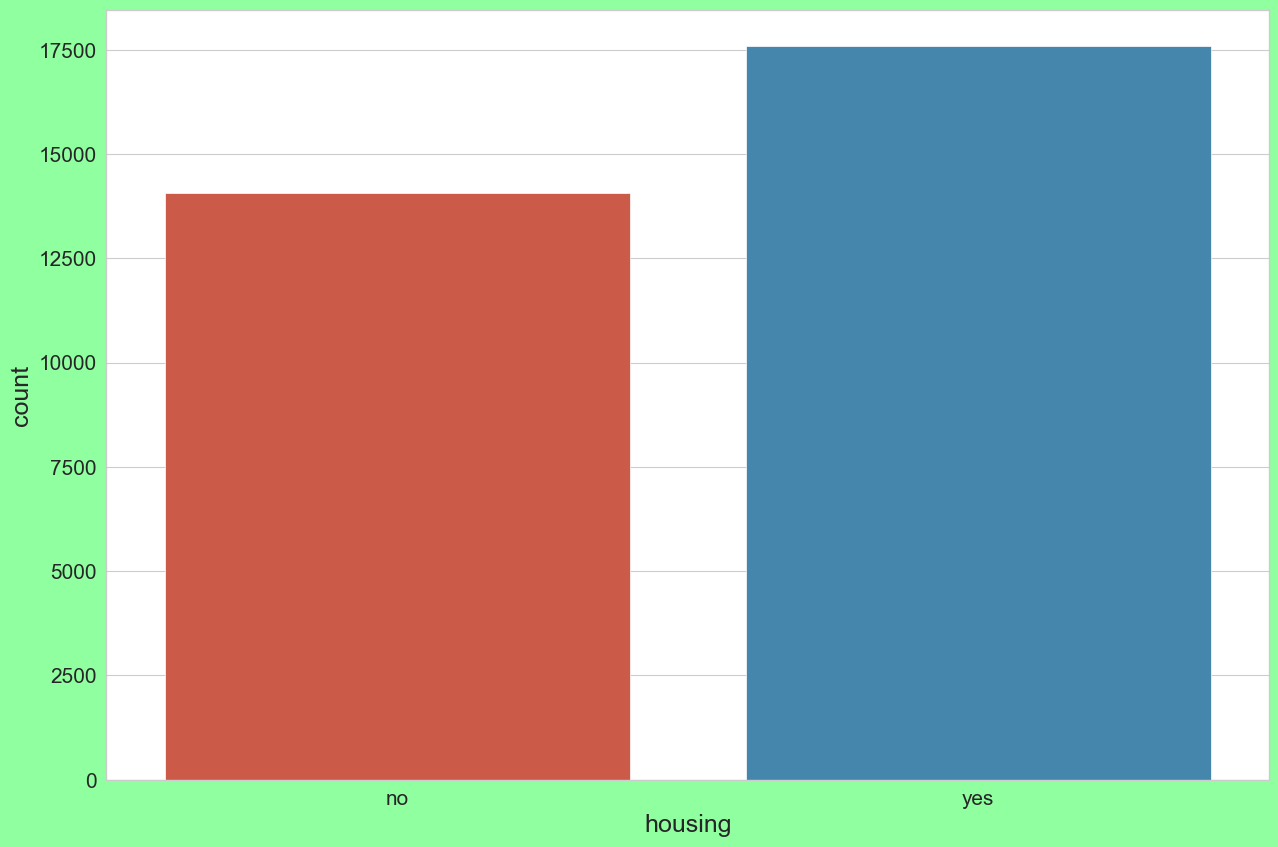

In [32]:
l="housing"
print(df[l].value_counts())
sns.countplot(data=df, x=l)
plt.show()

### people holding Housing loan(17584) more than no housing loan(14063) peoples

no     31062
yes      585
Name: default, dtype: int64


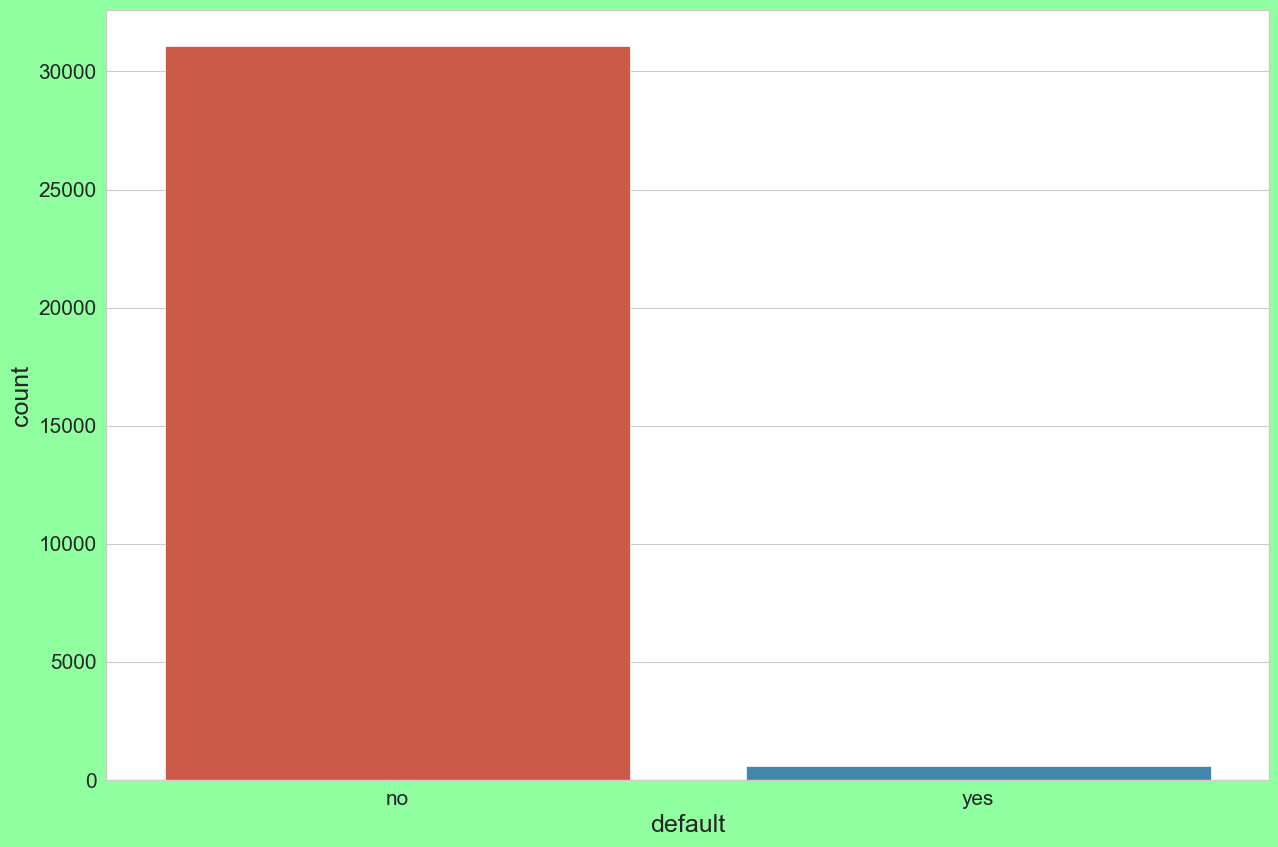

In [33]:
l="default"
print(df[l].value_counts())
sns.countplot(data=df, x=l)
plt.show()

### default credit people is less than NO credit people.

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


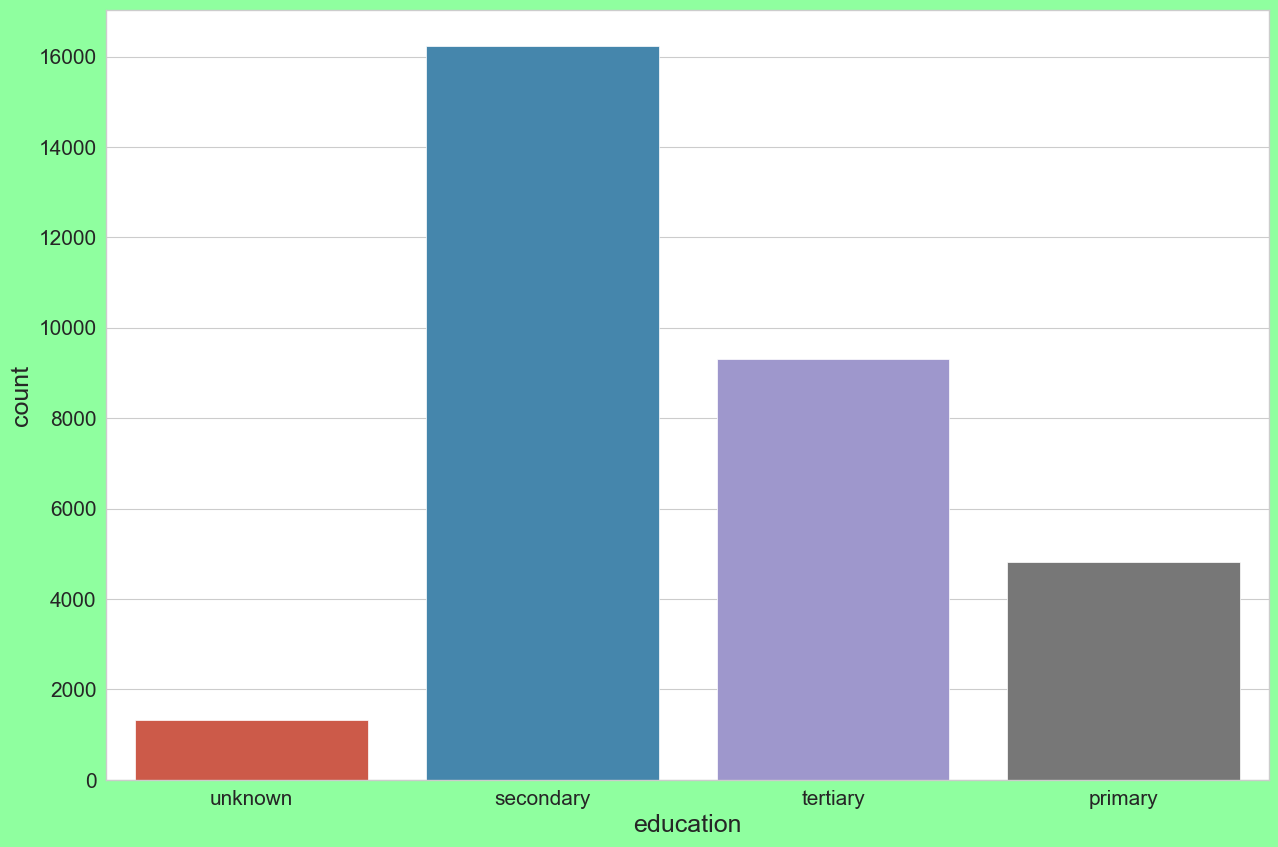

In [34]:
l="education"
print(df[l].value_counts())
sns.countplot(data=df, x=l)
plt.show()

### Secondary level of education people is more than other peoples. and some less people's education level is unknown

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


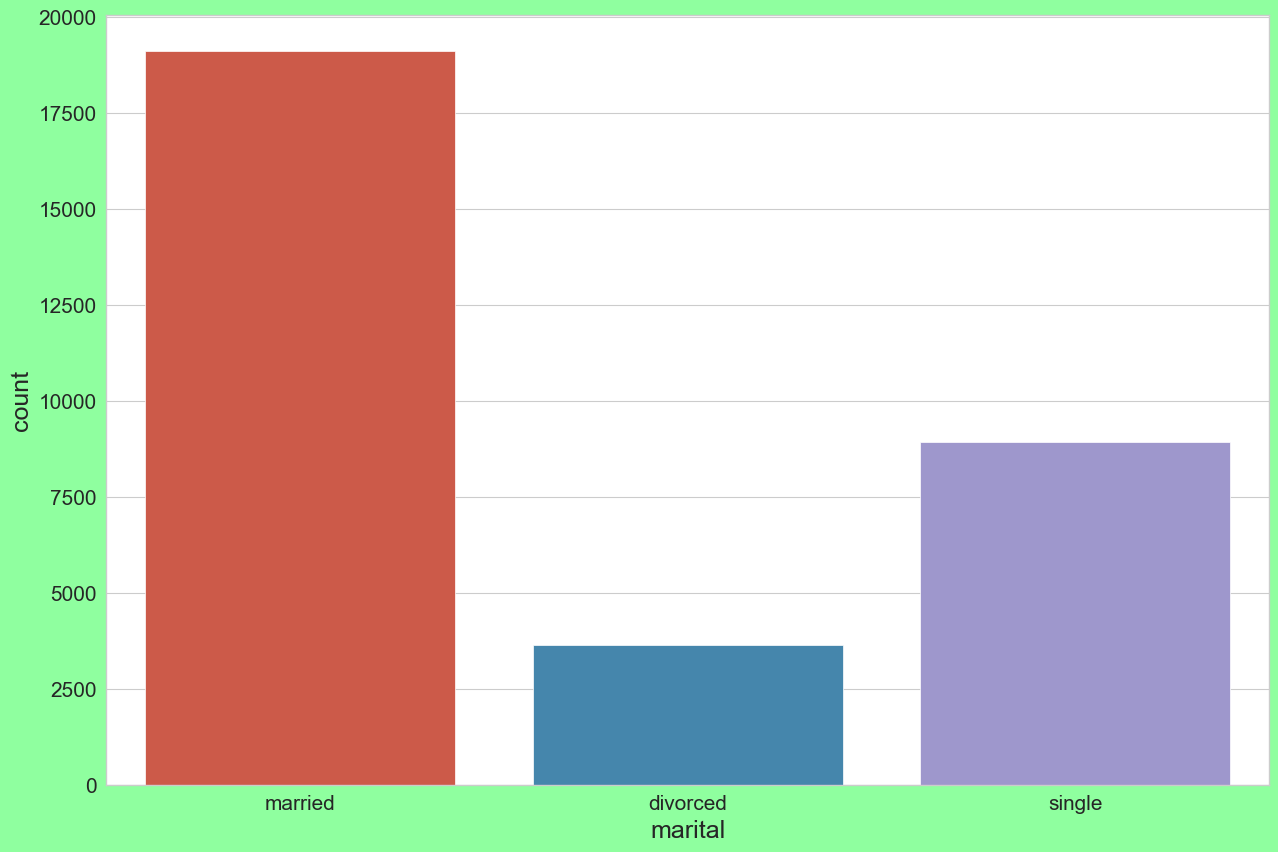

In [35]:
l="marital"
print(df[l].value_counts())
sns.countplot(data=df, x=l)
plt.show()

### Married people are higher(19095) than other people. and some less peoples are divorced(3630)

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


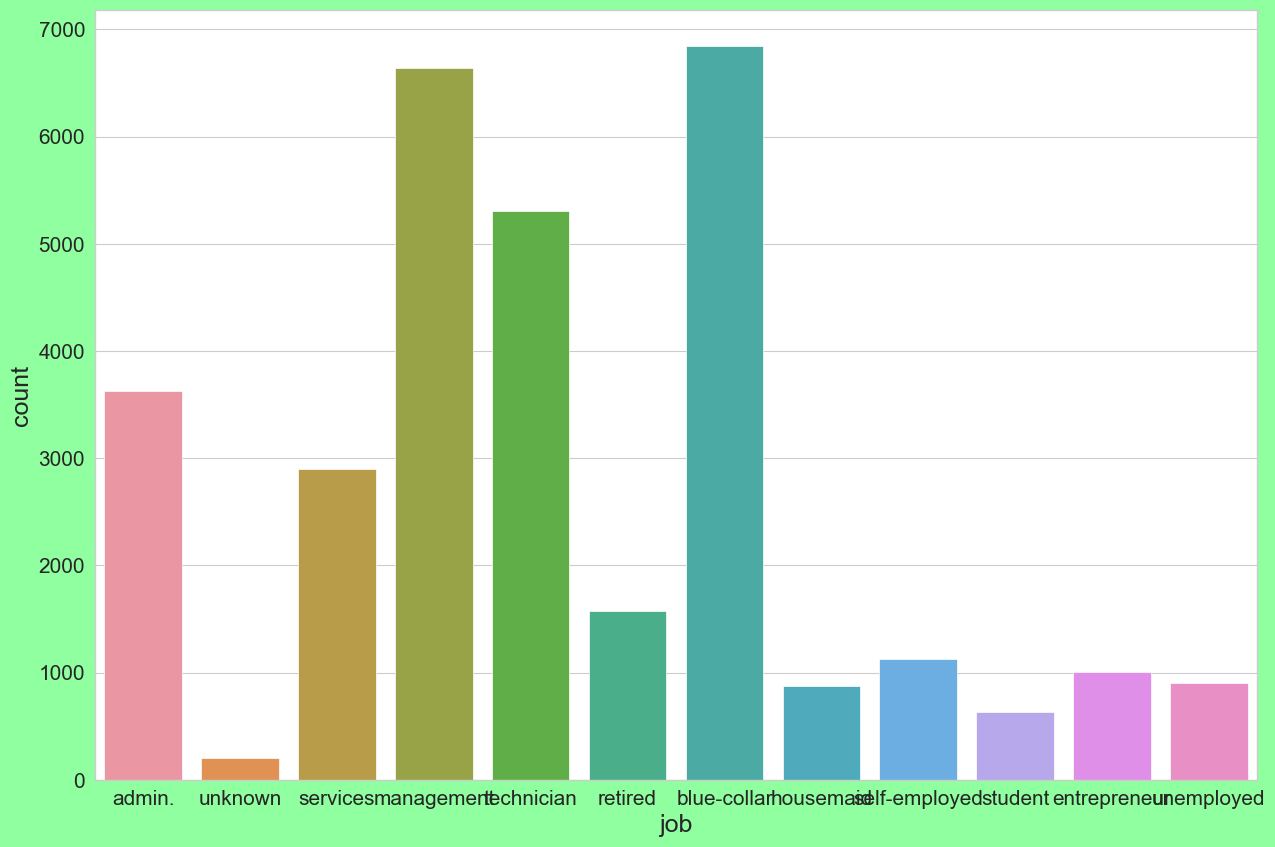

In [36]:
l="job"
print(df[l].value_counts())
sns.countplot(data=df, x=l)
plt.show()

### here people with blue collar jobs are high(6842) followed by management(6639) job. students are less(635). and some people(206) are unknown.

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


<AxesSubplot:xlabel='age', ylabel='Density'>

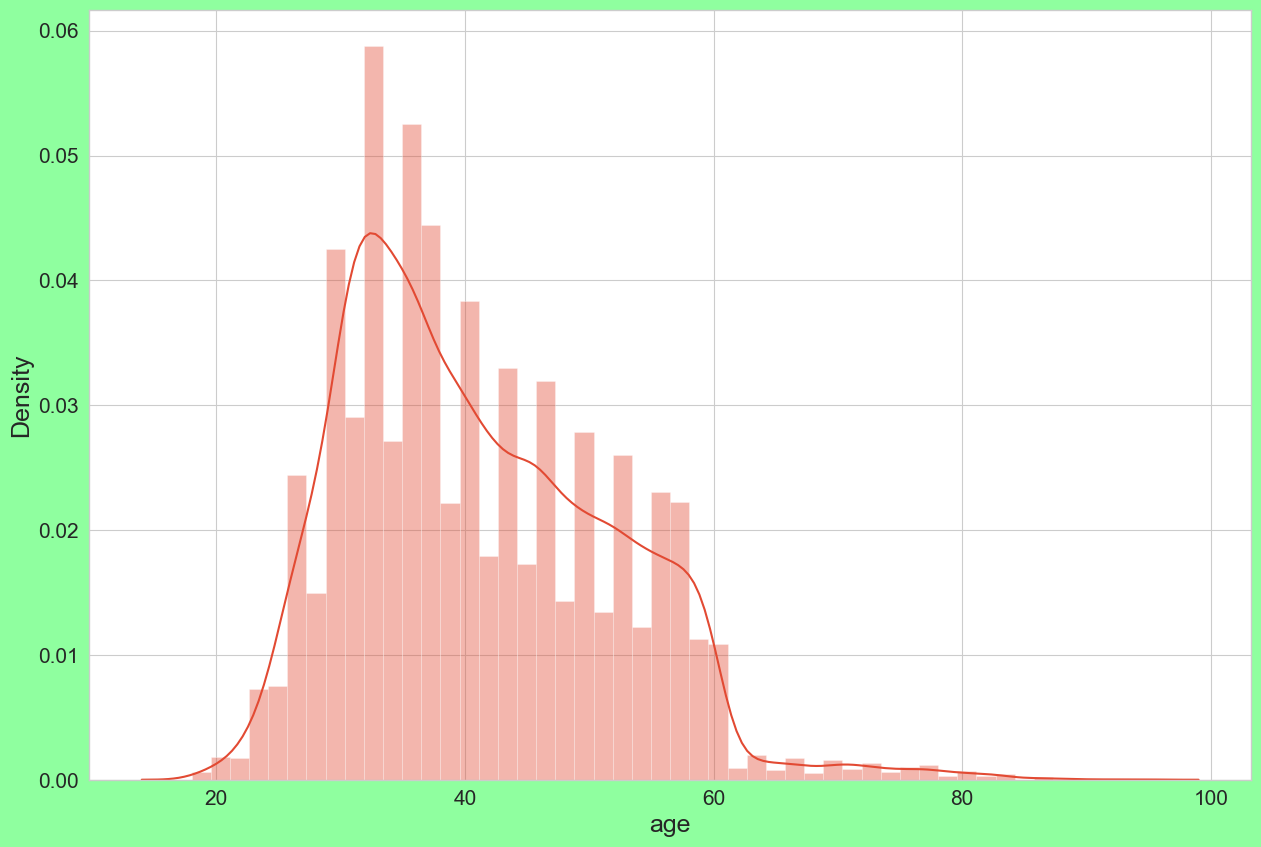

In [37]:
l="age"
print(df[l].value_counts())
sns.distplot(df[l])

### age level between 25 to 60's are more clients are available

# BIVARIATE ANALYSIS

job            subscribed
admin.         no            3179
               yes            452
blue-collar    no            6353
               yes            489
entrepreneur   no             923
               yes             85
housemaid      no             795
               yes             79
management     no            5716
               yes            923
retired        no            1212
               yes            362
self-employed  no             983
               yes            140
services       no            2649
               yes            254
student        no             453
               yes            182
technician     no            4713
               yes            594
unemployed     no             776
               yes            129
unknown        no             180
               yes             26
Name: subscribed, dtype: int64


<AxesSubplot:xlabel='job,subscribed'>

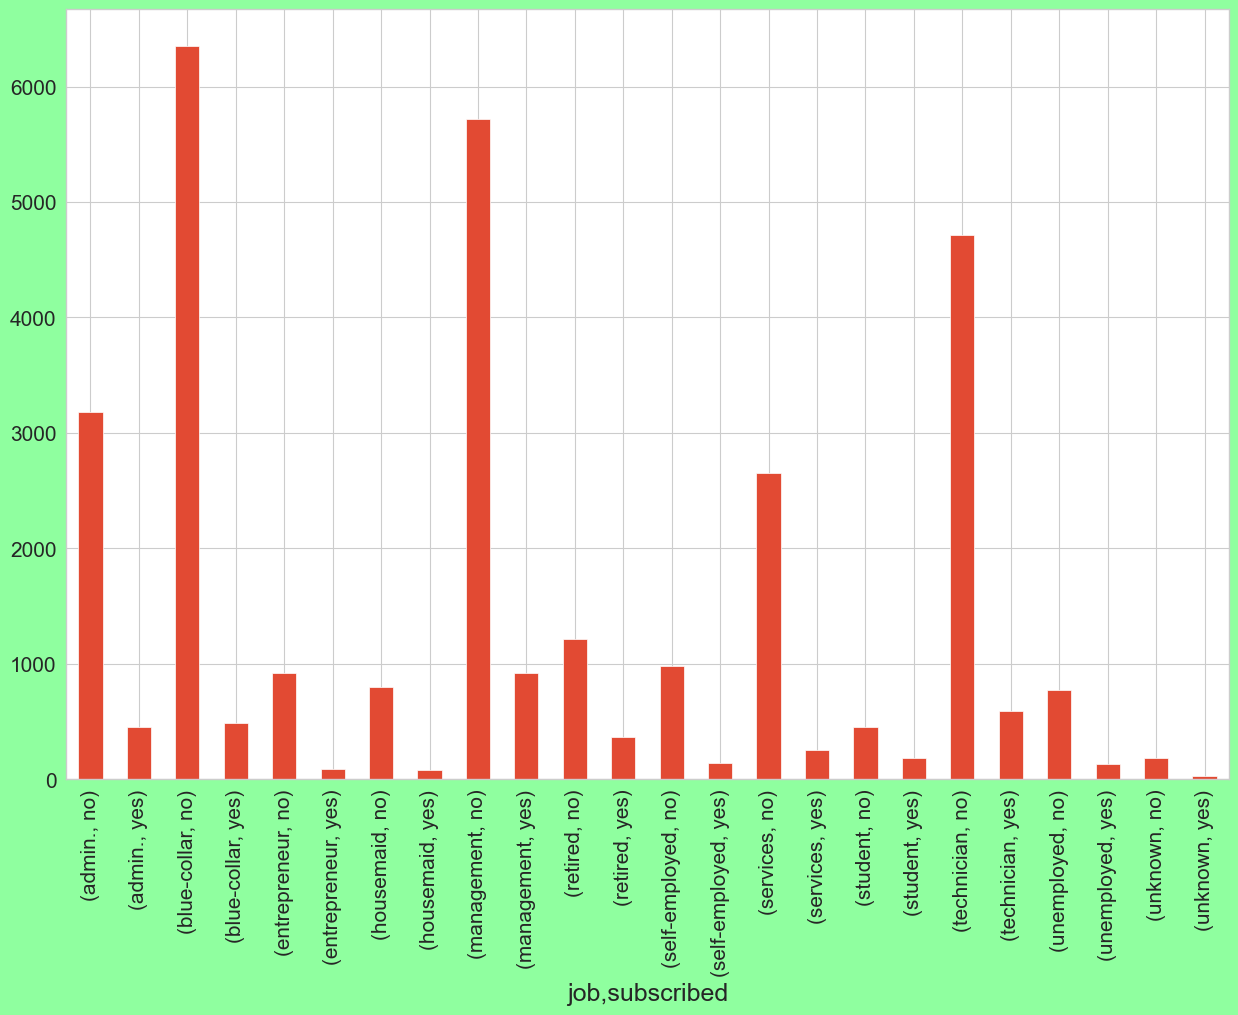

In [38]:
s=df.groupby('job')['subscribed'].value_counts()
print(s)
s.plot.bar()

### subcription people is less comparative to NO subcription people  and From above we see that most of the people who have subscribed are from management profession

default  subscribed
no       no            27388
         yes            3674
yes      no              544
         yes              41
Name: subscribed, dtype: int64


<AxesSubplot:xlabel='default,subscribed'>

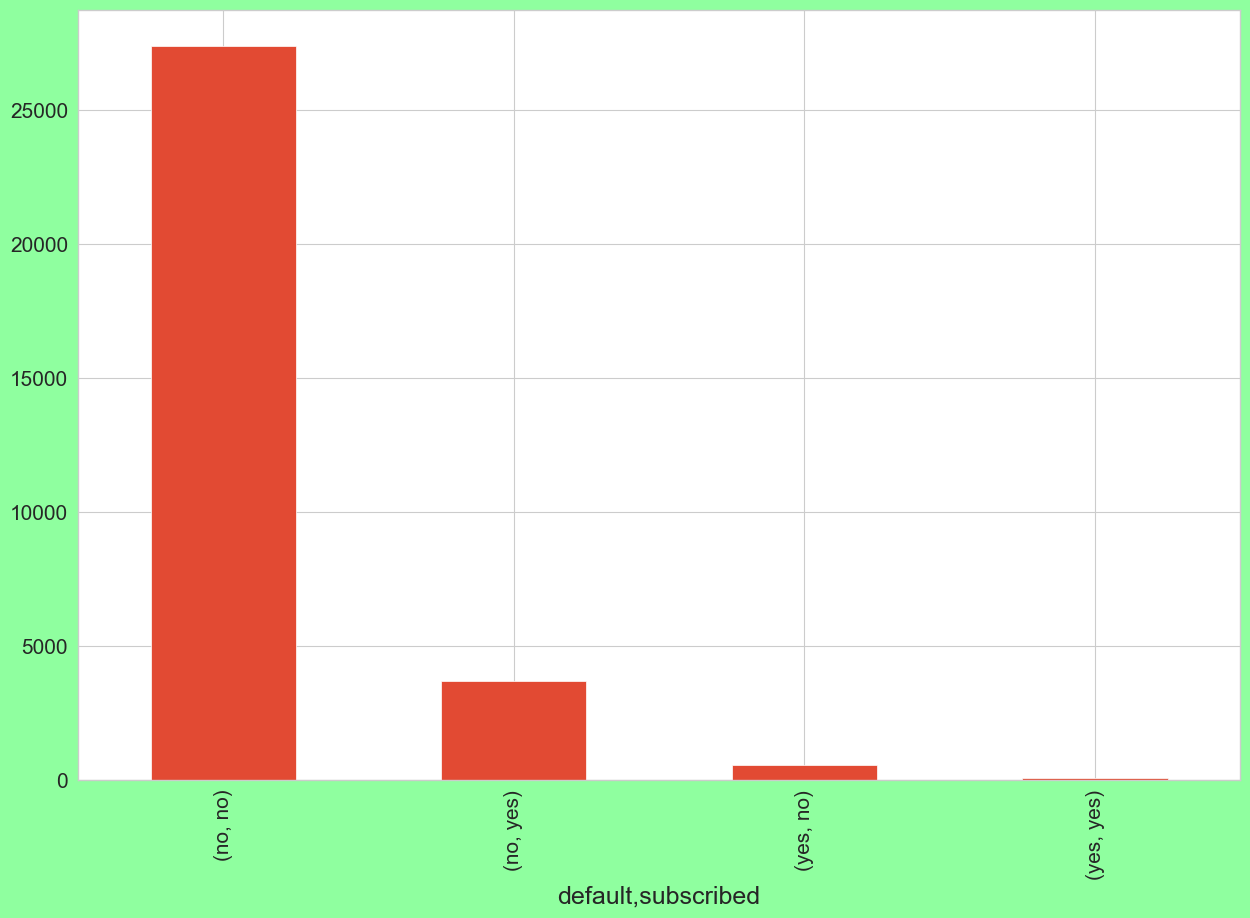

In [39]:
s1=df.groupby('default')['subscribed'].value_counts()
print(s1)
s1.plot.bar()

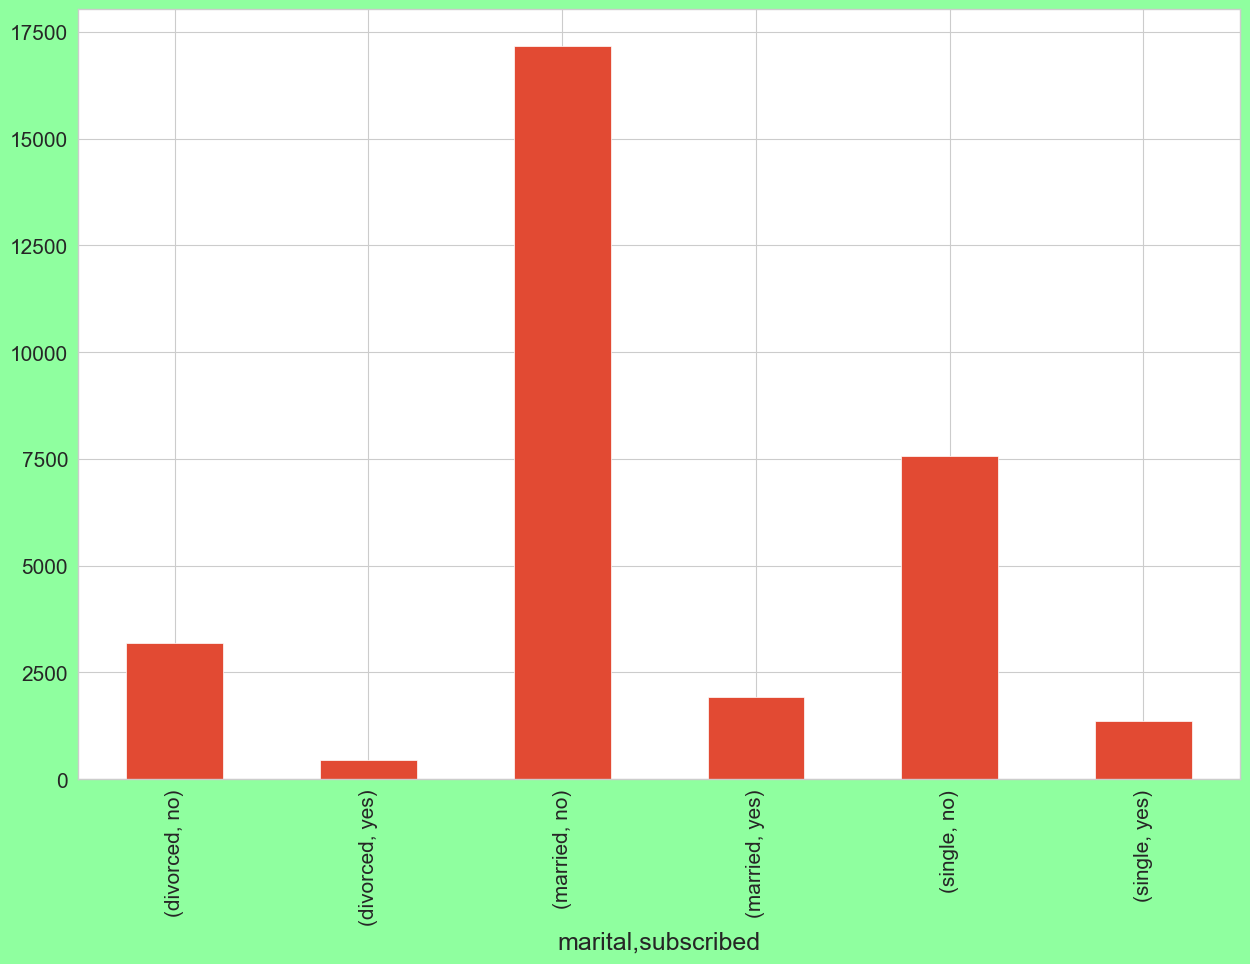

In [40]:
s3=df.groupby('marital')['subscribed'].value_counts().plot.bar()

### Marital vs subscribed people

# Multivariate analysis

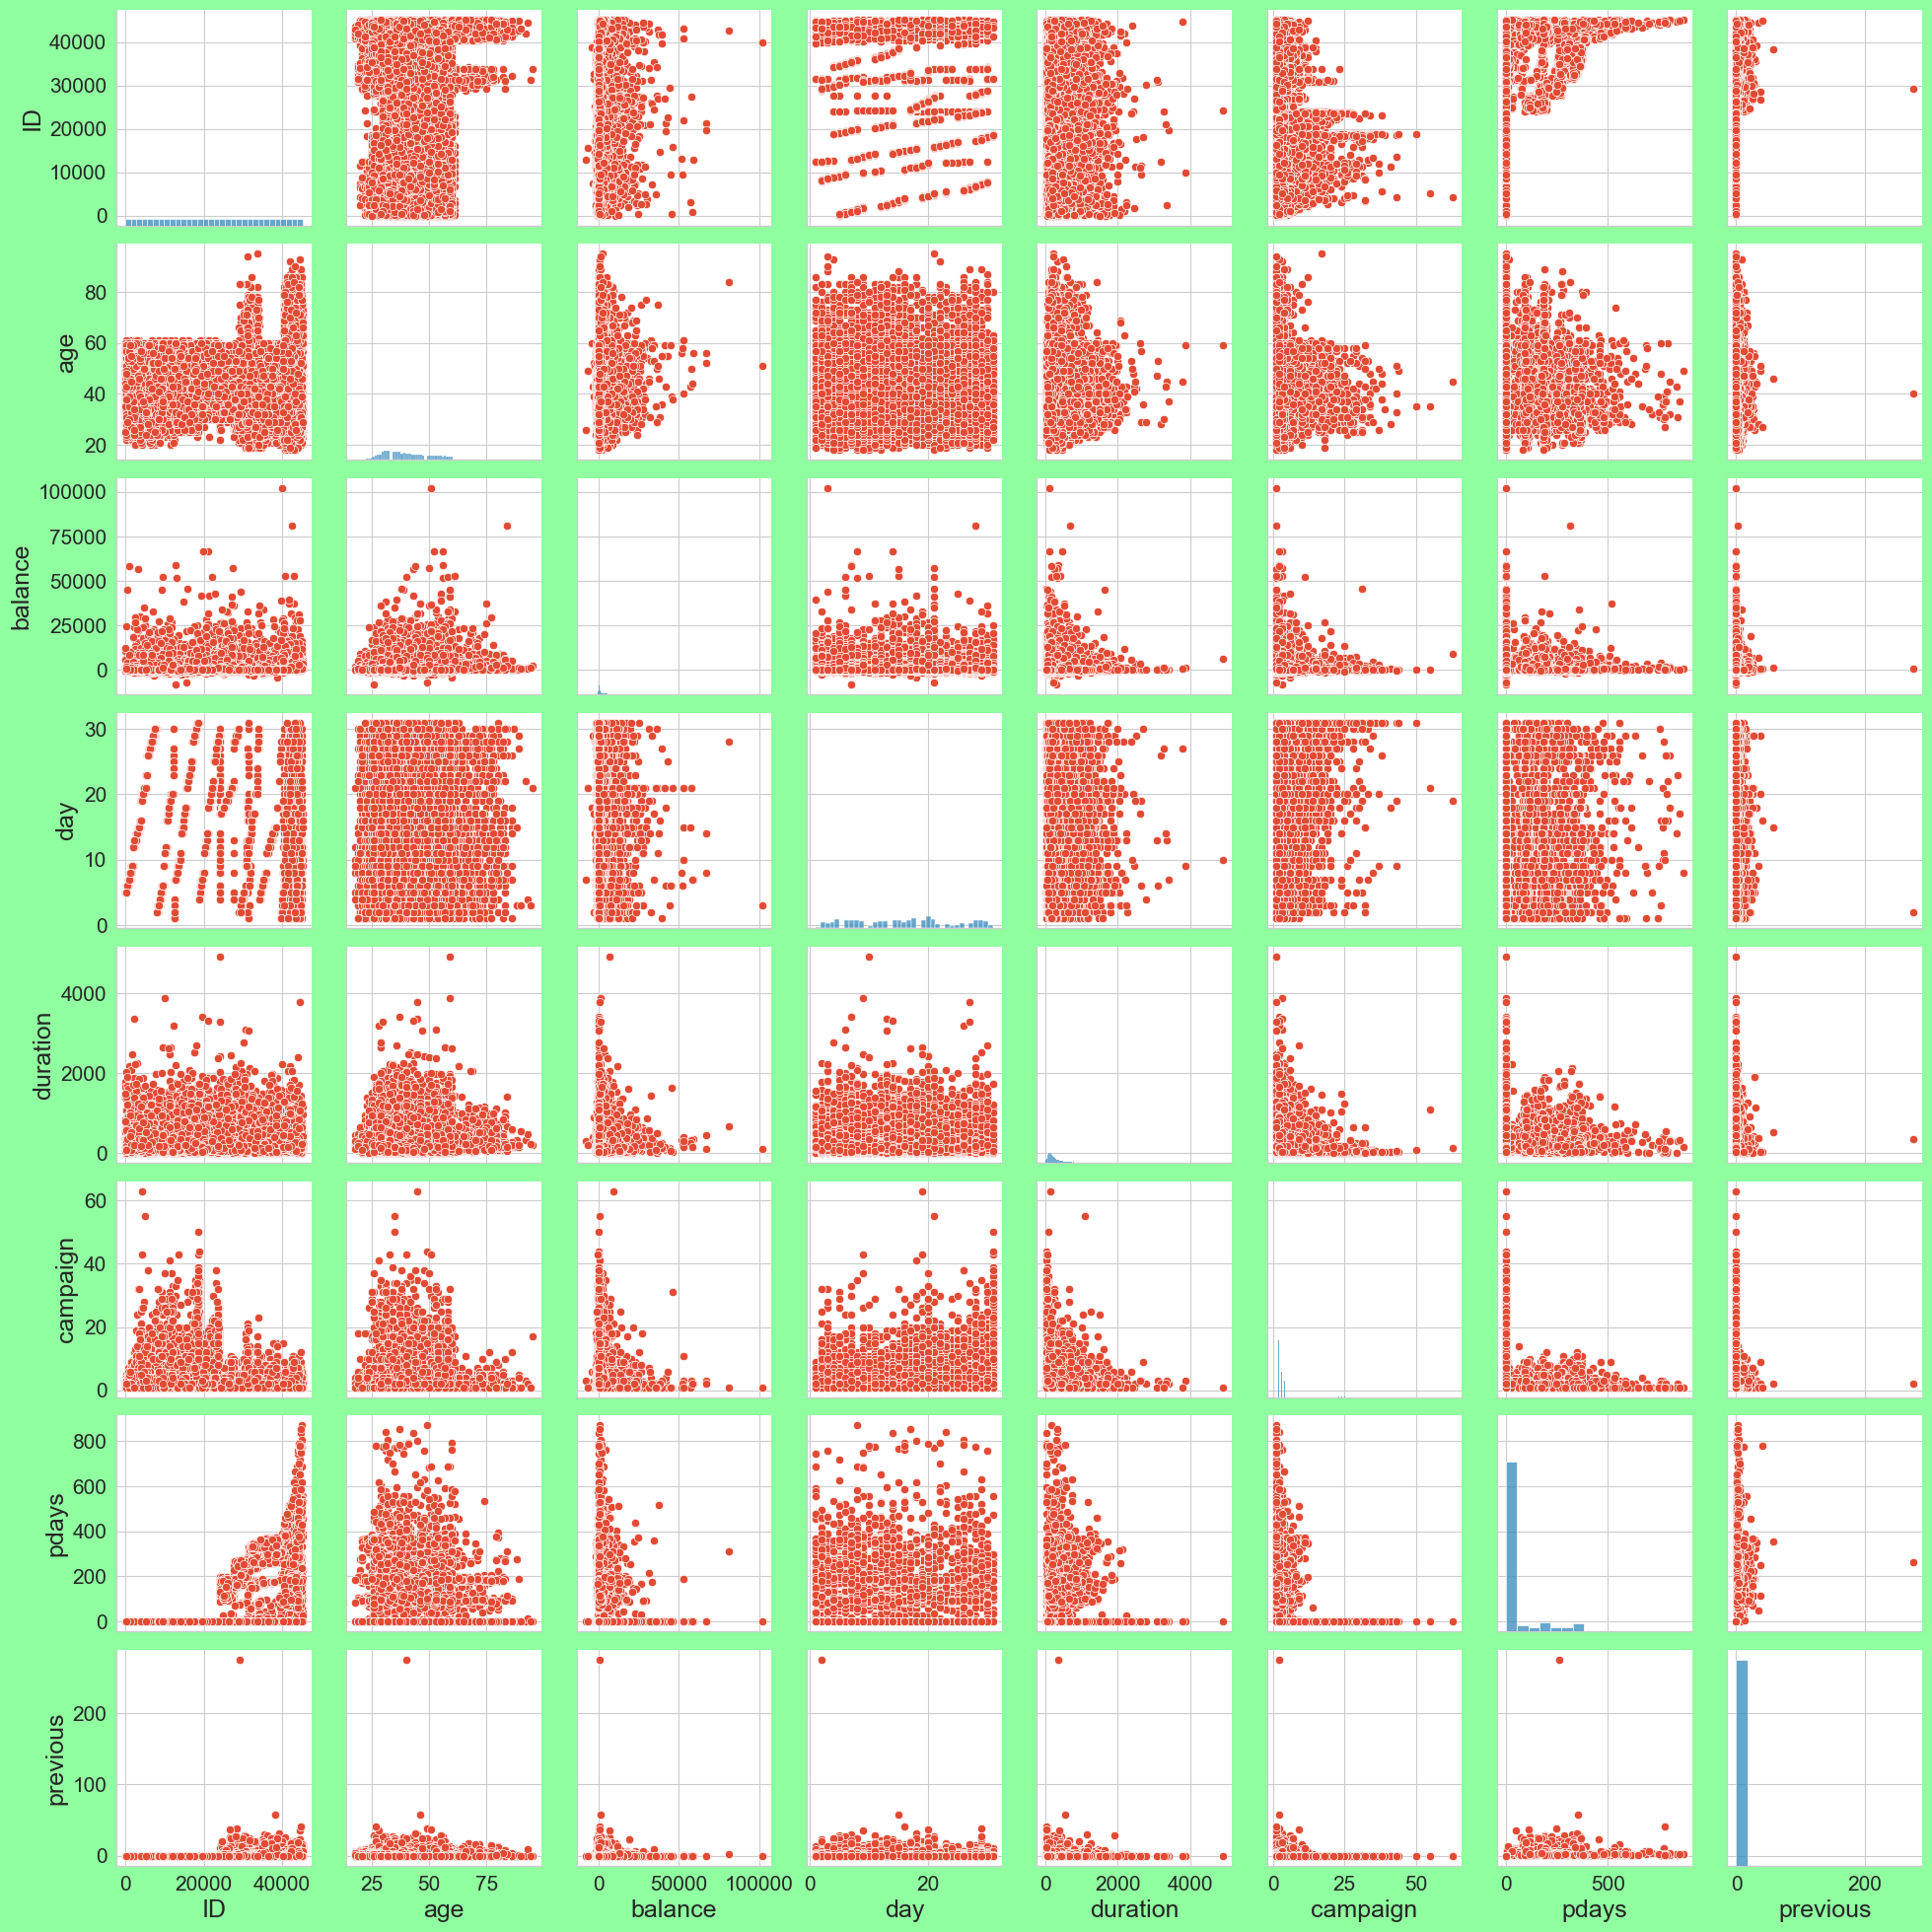

In [41]:
sns.pairplot(df)

# encoding

In [42]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [43]:
df=df.replace({'subscribed':{'no':0,'yes':1}})
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [44]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0
1,40576,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0
2,15320,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0
3,43962,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1
4,29842,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0
31643,40178,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1
31644,19710,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0
31645,38556,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0


### here converted all the object type(string) datatype into Numerical datatype.because ML understand only numerical datatypes to analysis

# CORRELATION

In [45]:
df.corr()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,1.000000,0.013337,0.061805,0.086454,0.096480,-0.051521,0.067897,-0.180047,-0.086140,-0.723830,-0.063399,-0.165274,0.007183,-0.103508,0.436148,0.254476,-0.443429,0.296663
age,0.013337,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,0.061805,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,0.086454,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,0.096480,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.051521,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.067897,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.180047,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.086140,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,-0.723830,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051


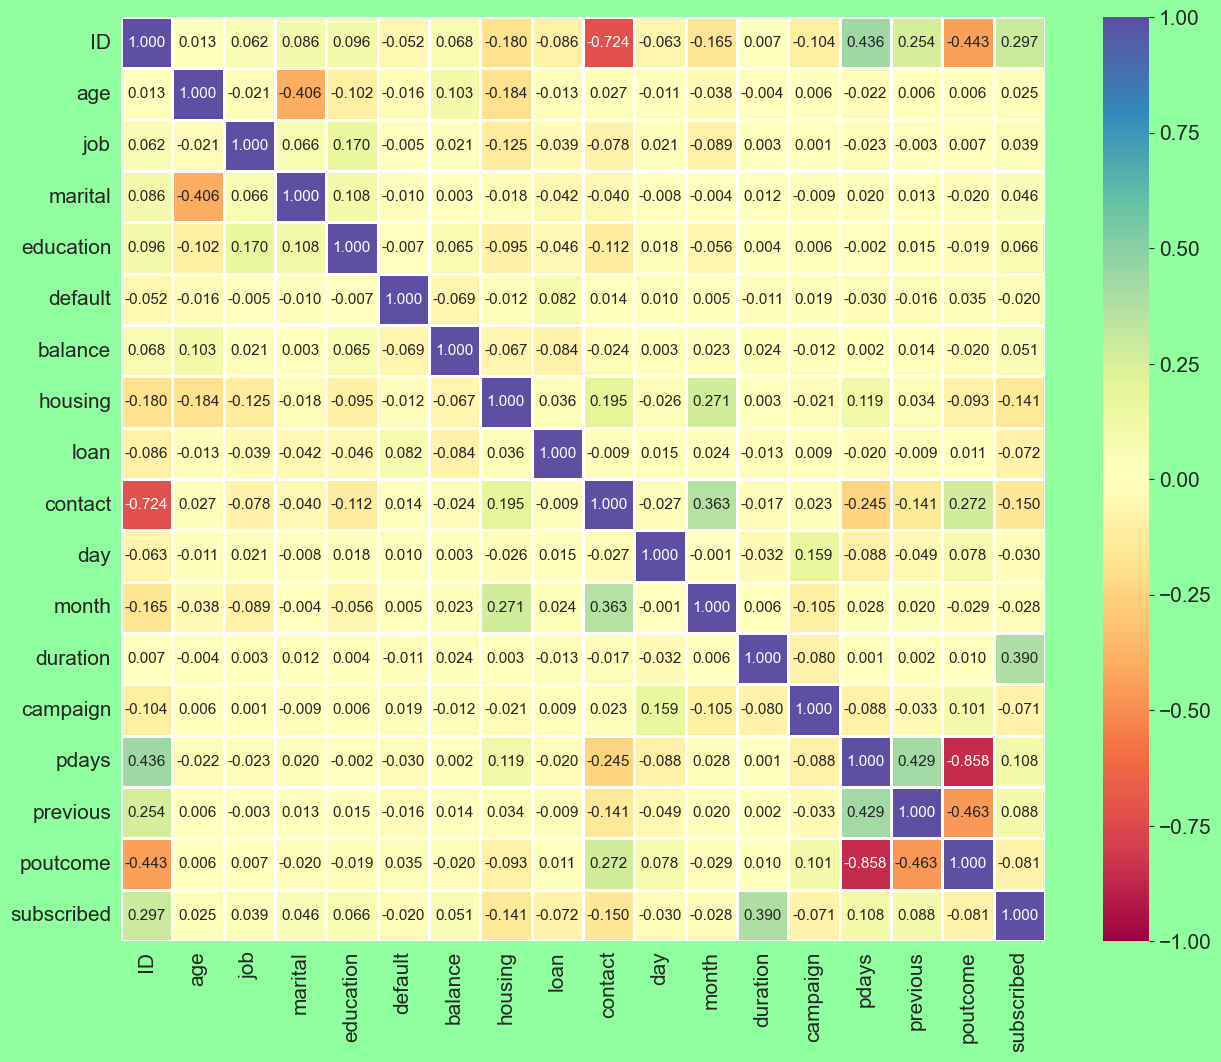

In [46]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':11}, cmap="Spectral",linewidth=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### *Darker colors indicate stronger correlations, while lighter colors indicate weaker correlations
*Negative correlations (when one variable increases, the other variable tends to decrease) are usually represented by RED

*Positive correlations (when one variable increases, the other variable tends to increase) are usually represented by BLUE

In [47]:
df.describe()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,13075.936990,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,11218.000000,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,22519.000000,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,33879.500000,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,45211.000000,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


## Skewness

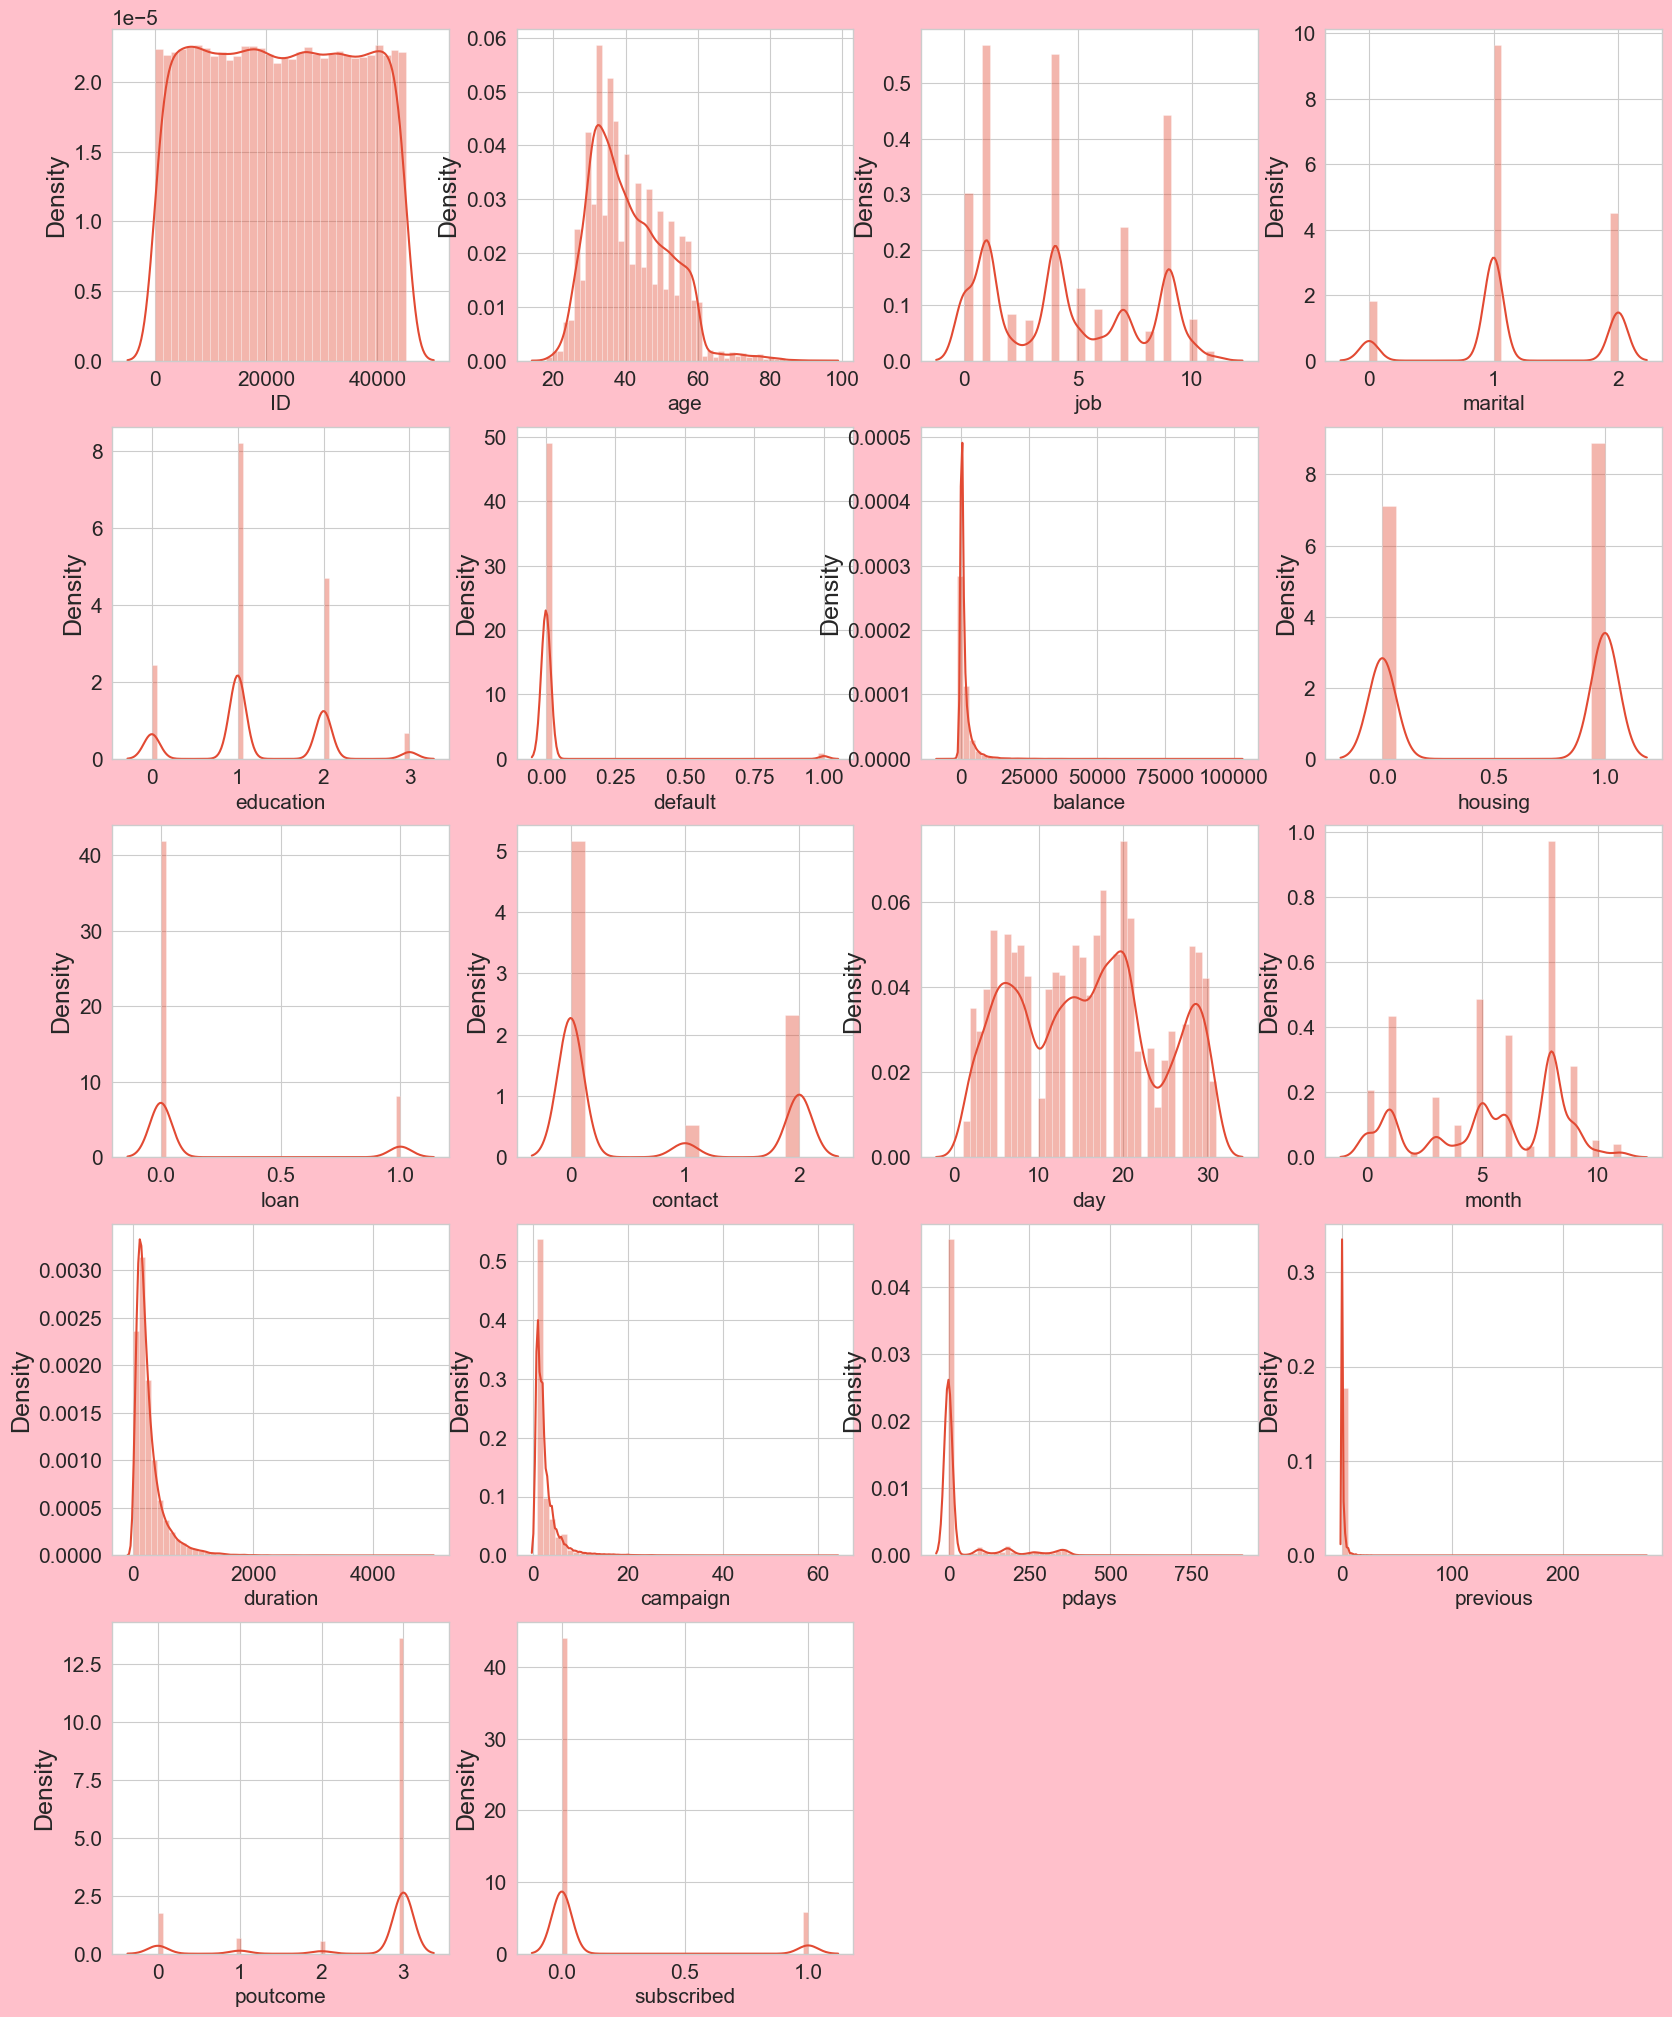

In [48]:
plt.figure(figsize=(20,25),facecolor='pink')
pltno=1

for i in df:
    if pltno<=18:
        ax=plt.subplot(5,4,pltno)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=15)
        
    pltno+=1

In [49]:
df.skew()

ID             0.005851
age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

From above we can see that there is a lot of skewness present in some columns, so we will remove from the non-categorical columns

# remove skewness

In [50]:
df['balance']=np.cbrt(df['balance'])
df['duration']=np.cbrt(df['duration'])
df['campaign']=np.cbrt(df['campaign'])
df['pdays']=np.cbrt(df['pdays'])
df['previous']=np.cbrt(df['previous'])
df['default']=np.cbrt(df['default'])

In [51]:
df.skew()

ID            0.005851
age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.647275
campaign      1.667938
pdays         1.779036
previous      2.079738
poutcome     -1.996421
subscribed    2.377445
dtype: float64

Skewness is pretty much reduced now

# outliers

ID               AxesSubplot(0.125,0.653529;0.110714x0.226471)
age           AxesSubplot(0.257857,0.653529;0.110714x0.226471)
job           AxesSubplot(0.390714,0.653529;0.110714x0.226471)
marital       AxesSubplot(0.523571,0.653529;0.110714x0.226471)
education     AxesSubplot(0.656429,0.653529;0.110714x0.226471)
default       AxesSubplot(0.789286,0.653529;0.110714x0.226471)
balance          AxesSubplot(0.125,0.381765;0.110714x0.226471)
housing       AxesSubplot(0.257857,0.381765;0.110714x0.226471)
loan          AxesSubplot(0.390714,0.381765;0.110714x0.226471)
contact       AxesSubplot(0.523571,0.381765;0.110714x0.226471)
day           AxesSubplot(0.656429,0.381765;0.110714x0.226471)
month         AxesSubplot(0.789286,0.381765;0.110714x0.226471)
duration             AxesSubplot(0.125,0.11;0.110714x0.226471)
campaign          AxesSubplot(0.257857,0.11;0.110714x0.226471)
pdays             AxesSubplot(0.390714,0.11;0.110714x0.226471)
previous          AxesSubplot(0.523571,0.11;0.110714x0.

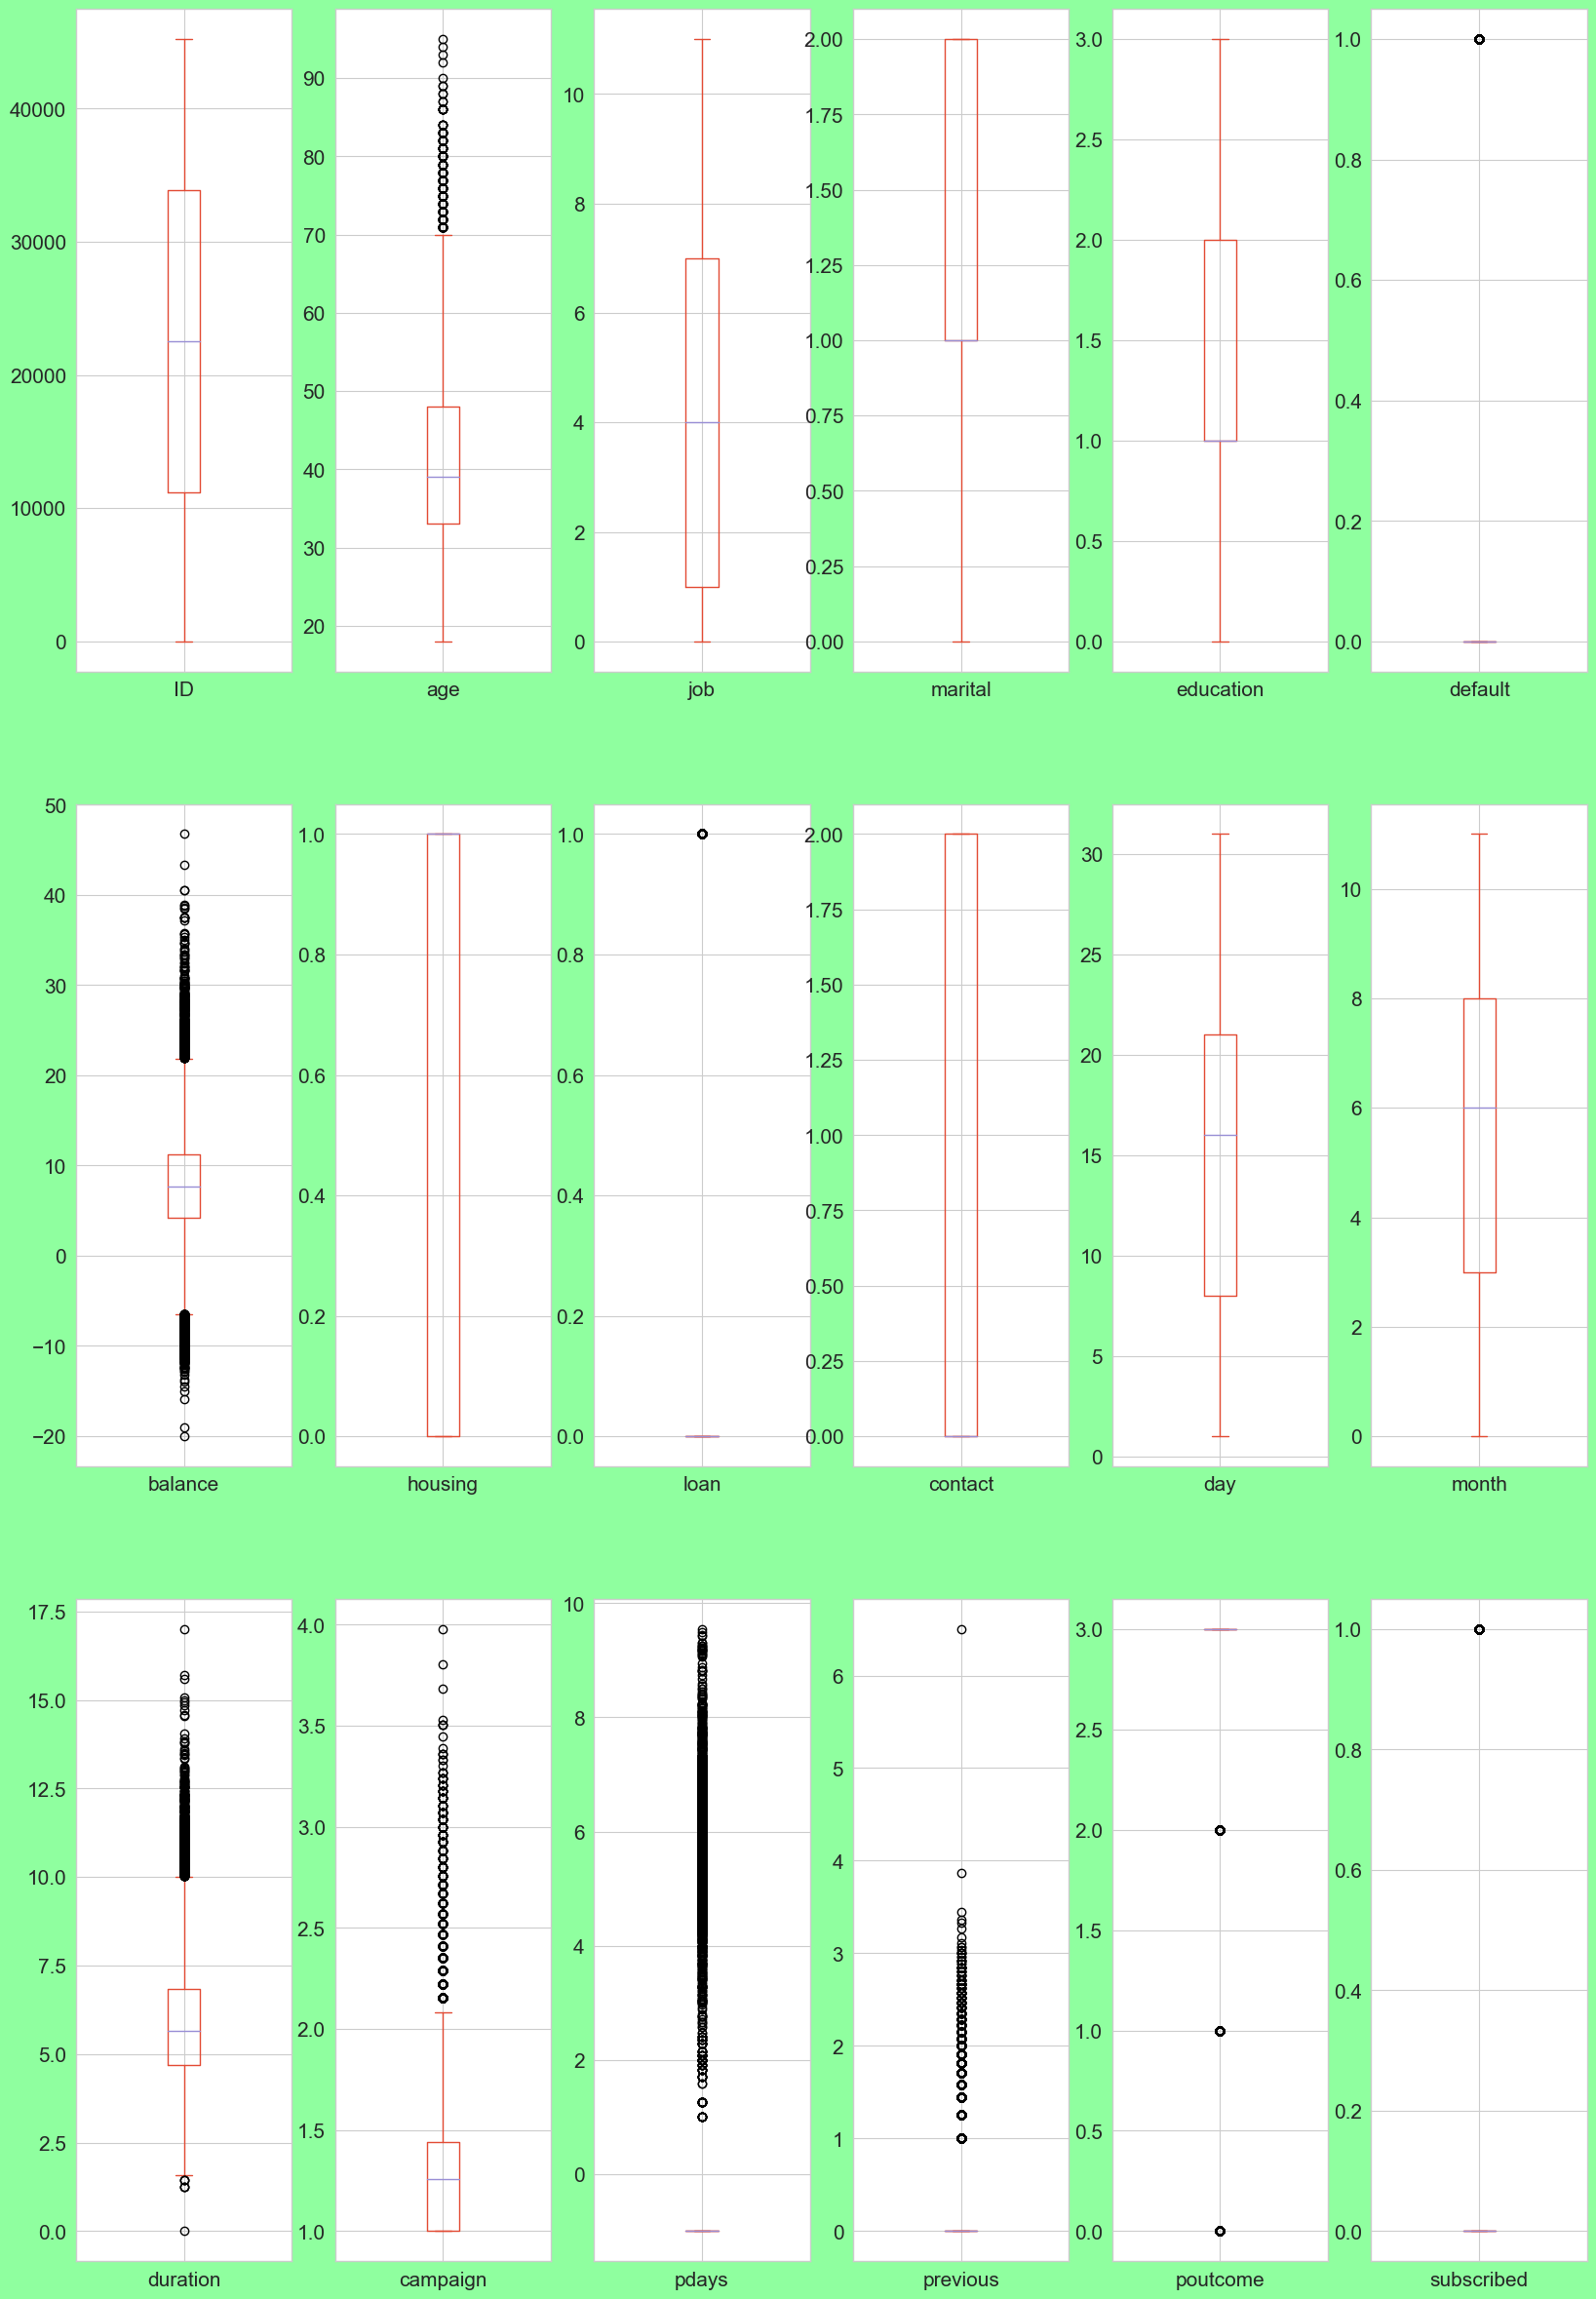

In [52]:
df.plot(kind='box',subplots=True,layout=(3,6),figsize=(20,30))

we can see that there are outliers present so we will remove them now

In [53]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df_new.shape

(array([   10,    21,   109, ..., 31622, 31645, 31646], dtype=int64), array([ 5, 13,  5, ...,  1, 15, 12], dtype=int64))


(29295, 18)

In [54]:
#Checking for Data loss
(31647-29295)/31647*100

7.43198407431984

Dataloss is less than 10% . so removal of outliers is accepted and proceed further

In [55]:
df_new.skew()

ID            0.009510
age           0.445711
job           0.266852
marital      -0.101307
education     0.201139
default       0.000000
balance      -0.227383
housing      -0.245919
loan          1.857097
contact       0.747835
day           0.098450
month        -0.507696
duration      0.475143
campaign      1.004804
pdays         1.873623
previous      1.947417
poutcome     -2.093100
subscribed    2.477753
dtype: float64

checking skewness after removal of outlier  , gives better skewness.

## Balancing the data

0    26045
1     3250
Name: subscribed, dtype: int64

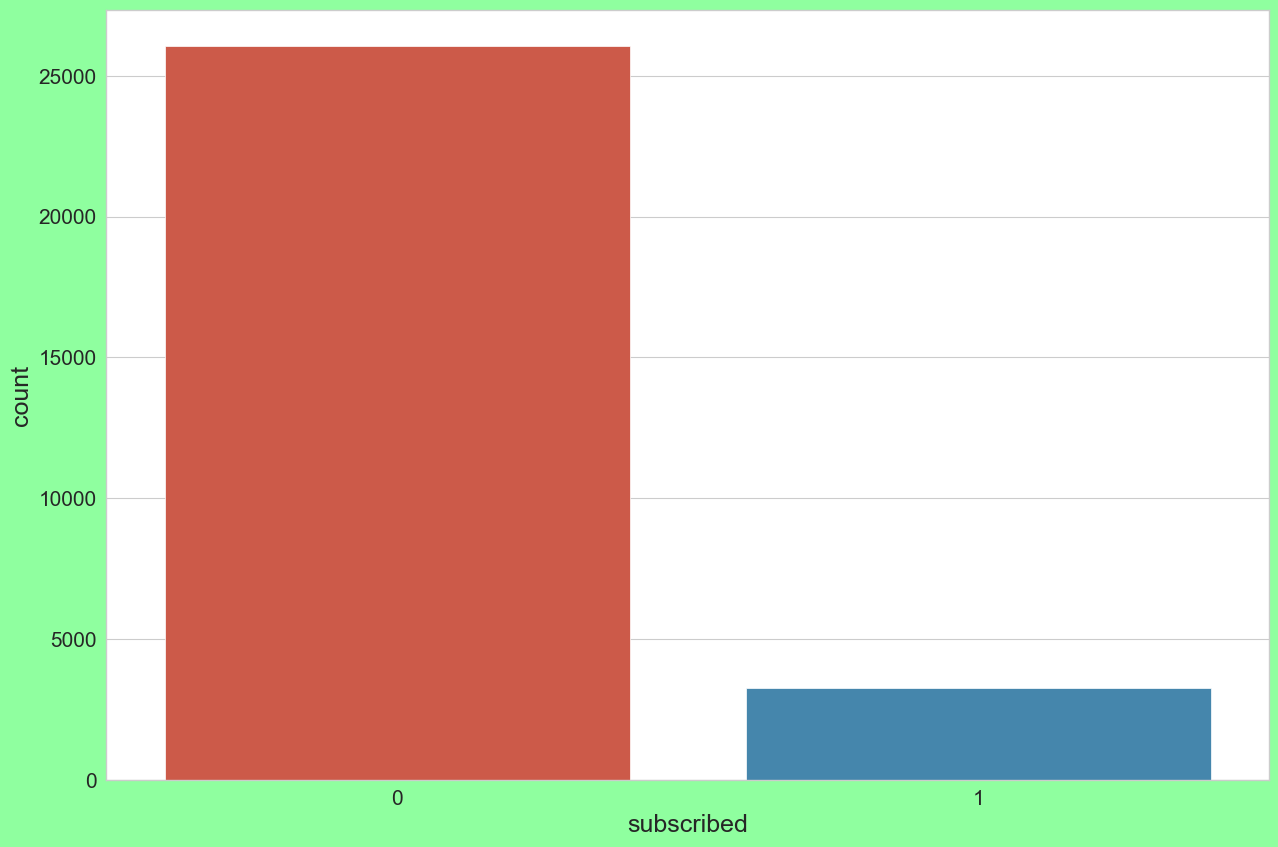

In [56]:
sns.countplot(x=df_new['subscribed'])
df_new['subscribed'].value_counts()

data is not balanced , so lets balance

# Standardizing of data

In [57]:
#splitting the data
X=df_new.drop(['subscribed'],axis=1)
Y=df_new['subscribed']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)
scaled_X

array([[ 0.28959125,  1.5258049 , -1.31592361, ..., -0.44470289,
        -0.44170258,  0.4258744 ],
       [ 1.3990828 , -0.95448827,  2.03156492, ..., -0.44470289,
        -0.44170258,  0.4258744 ],
       [-0.53796396, -1.35133518,  0.81429636, ..., -0.44470289,
        -0.44170258,  0.4258744 ],
       ...,
       [ 1.08516403, -1.15291172, -0.09865506, ..., -0.44470289,
        -0.44170258,  0.4258744 ],
       [ 1.36855759,  1.22816972, -0.09865506, ..., -0.44470289,
        -0.44170258,  0.4258744 ],
       [-0.20126634, -0.85527654, -0.09865506, ..., -0.44470289,
        -0.44170258,  0.4258744 ]])

## Checking multicollinearity using VIF

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,ID,2.865458
1,age,1.275019
2,job,1.051168
3,marital,1.239789
4,education,1.069019
5,default,NaN
6,balance,1.054751
7,housing,1.202631
8,loan,1.036596
9,contact,2.623073


As pdays,PREVIOUS is having vif factor more than 10 we will remove it

In [59]:
df_new.drop(['previous'],axis=1,inplace=True)
x=sc.fit_transform(df_new.iloc[:,:-1])
y=df_new.iloc[:,-1]

In [60]:
df_new.drop(['pdays'],axis=1,inplace=True)
x=sc.fit_transform(df_new.iloc[:,:-1])
y=df_new.iloc[:,-1]

In [61]:
#splitting the data
X=df_new.drop(['subscribed'],axis=1)
Y=df_new['subscribed']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)
scaled_X

array([[ 0.28959125,  1.5258049 , -1.31592361, ..., -1.39936591,
        -0.05973271,  0.4258744 ],
       [ 1.3990828 , -0.95448827,  2.03156492, ..., -0.81297485,
        -0.05973271,  0.4258744 ],
       [-0.53796396, -1.35133518,  0.81429636, ...,  0.22729099,
        -0.94325718,  0.4258744 ],
       ...,
       [ 1.08516403, -1.15291172, -0.09865506, ..., -0.58325439,
        -0.05973271,  0.4258744 ],
       [ 1.36855759,  1.22816972, -0.09865506, ...,  1.06355162,
        -0.05973271,  0.4258744 ],
       [-0.20126634, -0.85527654, -0.09865506, ..., -1.51943662,
         0.56003898,  0.4258744 ]])

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,ID,2.702834
1,age,1.274633
2,job,1.050842
3,marital,1.239743
4,education,1.068130
5,default,NaN
6,balance,1.054100
7,housing,1.194501
8,loan,1.036400
9,contact,2.594678


now VIF has been removed

We can see that every column is in the acceptable range

## Balancing the data 

In [63]:
from imblearn.under_sampling import NearMiss
nm=NearMiss(sampling_strategy=0.75)
train_x,train_y=nm.fit_resample(X,Y)
train_y.value_counts()

0    4333
1    3250
Name: subscribed, dtype: int64

### now data has balanced

<AxesSubplot:xlabel='subscribed', ylabel='count'>

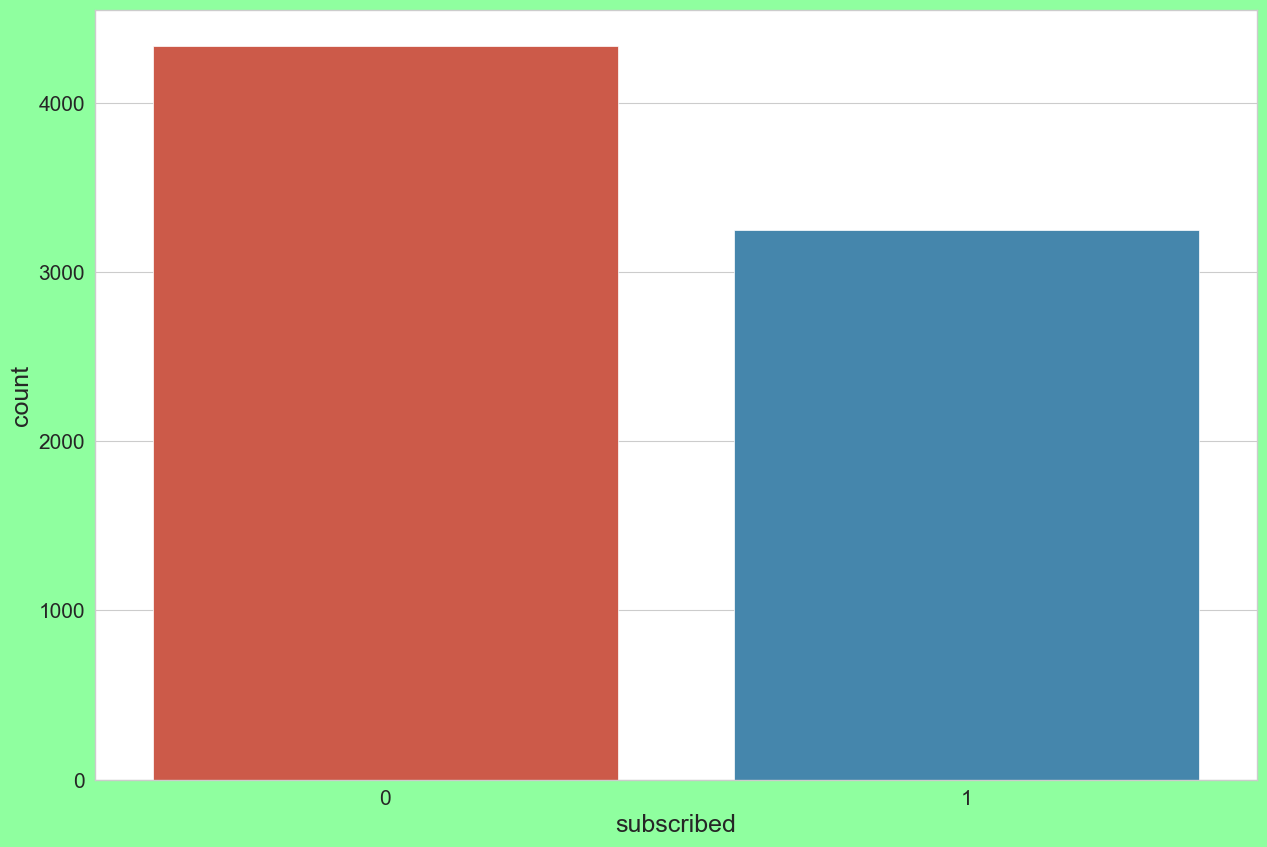

In [64]:
sns.countplot(x=train_y)

## Fitting the models now


In [65]:
models=[LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]

In [66]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state=i)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.920398689240852 on Random State: 44


So the best random state is 44

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state=44)

In [77]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of', m, 'is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:  0.9111141452758056

 Confusion matrix: 
 [[6389  182]
 [ 469  284]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6571
           1       0.61      0.38      0.47       753

    accuracy                           0.91      7324
   macro avg       0.77      0.67      0.71      7324
weighted avg       0.90      0.91      0.90      7324



Accuracy score of RandomForestClassifier() is:  0.9179410158383398

 Confusion matrix: 
 [[6352  219]
 [ 382  371]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6571
           1       0.63      0.49      0.55       753

    accuracy                           0.92      7324
   macro avg       0.79      0.73      0.75      7324
weighted avg       0.91      0.92      0.91      7324



Accuracy score of KNeighborsClassifier() is:  0.902921900600

### Accuracy score of RandomForestClassifier() is:  91.79%

## CrossVal Score

In [69]:
from sklearn.model_selection import cross_val_score
rfc=RandomForestClassifier()

In [70]:
for m in models:
    cvs=cross_val_score(m,x,y)
    print('For',m,'\n',cvs)
    print(cvs.mean(),'\n')

For LogisticRegression() 
 [0.90390852 0.90151903 0.89776412 0.90510326 0.90459123]
0.9025772316094898 

For RandomForestClassifier() 
 [0.91944018 0.91158901 0.91449053 0.91756272 0.91329578]
0.9152756443079022 

For KNeighborsClassifier() 
 [0.90203106 0.8979348  0.89930022 0.89674006 0.90117768]
0.899436763952893 

For DecisionTreeClassifier() 
 [0.88479263 0.88923024 0.89417989 0.88854753 0.89093702]
0.8895374637310122 

For SVC() 
 [0.91141833 0.90885817 0.90715139 0.90902884 0.91175969]
0.9096432838368322 



As per cross val score we see that Random Forest classifier is our best model so we will use that.

## Hyperparameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':(10,100),
      'criterion':['gini','entropy'],}
gs=GridSearchCV(rfc,param,cv=5)
gs.fit(x_train,y_train)
gs.best_params_

{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'log2'}

In [80]:
final_model=RandomForestClassifier(max_features='log2',criterion='entropy',max_depth=100)
final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 92.06717640633534


After hyperparameter tuning our model is giving 92% accuracy

## Saving the model

In [81]:
import joblib
joblib.dump(final_model,'Bank_Marketing.pkl')

['Bank_Marketing.pkl']

## Predicting the test dataset

In [82]:
testdf=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
testdf

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [83]:
for i in testdf.columns:
    if testdf[i].dtypes=='object':
        testdf[i]=oe.fit_transform(testdf[i].values.reshape(-1,1))

In [85]:
testdf.drop(['pdays'],axis=1,inplace=True)
testdf.drop(['previous'],axis=1,inplace=True)

In [87]:
testdf.drop(['ID'],axis=1,inplace=True)

In [88]:
test= joblib.load("bank_marketing.obj")
outcome=test.predict(testdf)
outcome

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [89]:
testdf['subscribed']=outcome
testdf

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,subscribed
0,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,3.0,1
1,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,3.0,1
2,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,3.0,1
3,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,3.0,1
4,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,3.0,1
13560,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,3.0,1
13561,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,3.0,1
13562,29,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,9.0,208,2,2.0,1


Test dataset has been predicted